# Fashion MNIST Model Training and Testing

This Jupyter Notebook is used to train and test various models on the Fashion MNIST dataset. 

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [2]:
import sys
sys.path.append("../scripts")

from train_utils import train_and_validate
from test_model import test_model

## Dataset import

In [3]:
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transforms.ToTensor())

In [4]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Normalization

In [5]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [6]:
train_data.transform = transform
test_data.transform = transform

## Validation set definition

In [7]:
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size

In [8]:
train_data, valid_data = torch.utils.data.random_split(train_data, [train_size, val_size])

## Creating dataloaders

In [9]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

# Model training and testing

## Custom CNN

### First simple CNN

In [10]:
class FirstCustomCNN(nn.Module):
    def __init__(self):
        super(FirstCustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x
    
model1 = FirstCustomCNN()

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.0001)

Epoch [1/50], Train Loss: 0.8769, Train Acc: 72.80%, Valid Loss: 0.5544, Valid Acc: 80.48%
Epoch [2/50], Train Loss: 0.4979, Train Acc: 82.14%, Valid Loss: 0.4649, Valid Acc: 83.67%
Epoch [3/50], Train Loss: 0.4350, Train Acc: 84.62%, Valid Loss: 0.4481, Valid Acc: 83.67%
Epoch [4/50], Train Loss: 0.4002, Train Acc: 85.69%, Valid Loss: 0.4014, Valid Acc: 86.29%
Epoch [5/50], Train Loss: 0.3767, Train Acc: 86.61%, Valid Loss: 0.3915, Valid Acc: 86.02%
Epoch [6/50], Train Loss: 0.3581, Train Acc: 87.28%, Valid Loss: 0.3677, Valid Acc: 86.92%
Epoch [7/50], Train Loss: 0.3436, Train Acc: 87.77%, Valid Loss: 0.3555, Valid Acc: 87.17%
Epoch [8/50], Train Loss: 0.3318, Train Acc: 88.18%, Valid Loss: 0.3409, Valid Acc: 88.17%
Epoch [9/50], Train Loss: 0.3214, Train Acc: 88.48%, Valid Loss: 0.3485, Valid Acc: 87.53%
Epoch [10/50], Train Loss: 0.3110, Train Acc: 88.88%, Valid Loss: 0.3320, Valid Acc: 88.45%
Epoch [11/50], Train Loss: 0.3026, Train Acc: 89.25%, Valid Loss: 0.3213, Valid Acc: 88.8

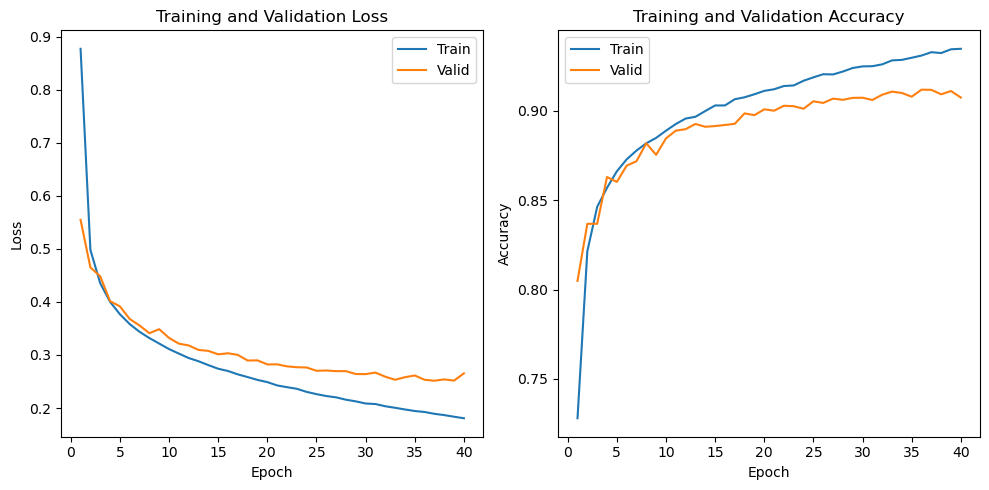

In [12]:
train_and_validate(model1, train_loader, valid_loader, criterion, optimizer, num_epochs=50, patience=3, plot=True, seed=42)

Test Accuracy: 90.69%
Precision: 0.9094
Recall: 0.9069
F1 Score: 0.9047


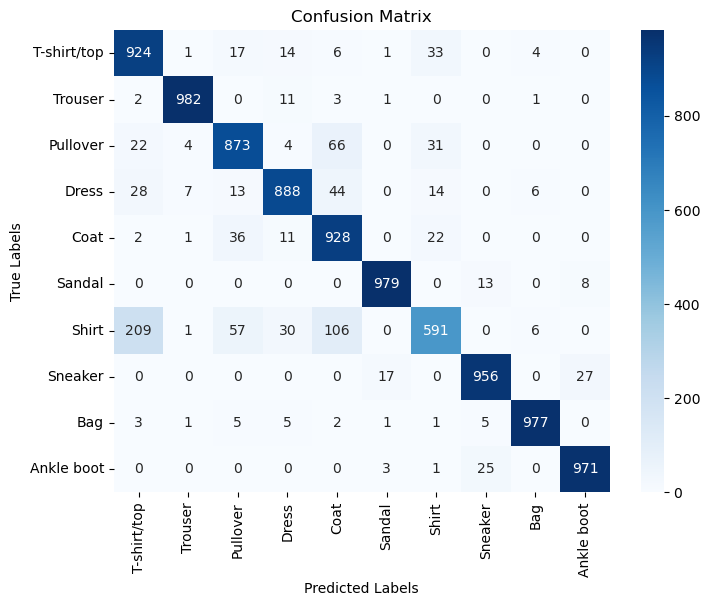

In [13]:
test_model(model1, test_loader, classes, seed=42)

regolarizzo con dropout ovunque la prima rete

In [14]:
class FirstCustomCNNRegularized(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super(FirstCustomCNNRegularized, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout2d(p=dropout_prob)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout2d(p=dropout_prob)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.dropout1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.dropout2(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc2(x)
        return x

model2 = FirstCustomCNNRegularized()

Epoch [1/100], Train Loss: 1.2500, Train Acc: 56.76%, Valid Loss: 0.6443, Valid Acc: 76.50%
Epoch [2/100], Train Loss: 0.7548, Train Acc: 73.33%, Valid Loss: 0.5583, Valid Acc: 79.33%
Epoch [3/100], Train Loss: 0.6616, Train Acc: 76.51%, Valid Loss: 0.5092, Valid Acc: 80.76%
Epoch [4/100], Train Loss: 0.6139, Train Acc: 78.16%, Valid Loss: 0.4775, Valid Acc: 82.38%
Epoch [5/100], Train Loss: 0.5776, Train Acc: 79.64%, Valid Loss: 0.4501, Valid Acc: 83.62%
Epoch [6/100], Train Loss: 0.5463, Train Acc: 80.79%, Valid Loss: 0.4303, Valid Acc: 84.40%
Epoch [7/100], Train Loss: 0.5234, Train Acc: 81.55%, Valid Loss: 0.4108, Valid Acc: 85.39%
Epoch [8/100], Train Loss: 0.5085, Train Acc: 82.10%, Valid Loss: 0.4004, Valid Acc: 85.67%
Epoch [9/100], Train Loss: 0.4941, Train Acc: 83.02%, Valid Loss: 0.3903, Valid Acc: 85.91%
Epoch [10/100], Train Loss: 0.4823, Train Acc: 83.35%, Valid Loss: 0.3836, Valid Acc: 86.38%
Epoch [11/100], Train Loss: 0.4695, Train Acc: 83.62%, Valid Loss: 0.3695, Vali

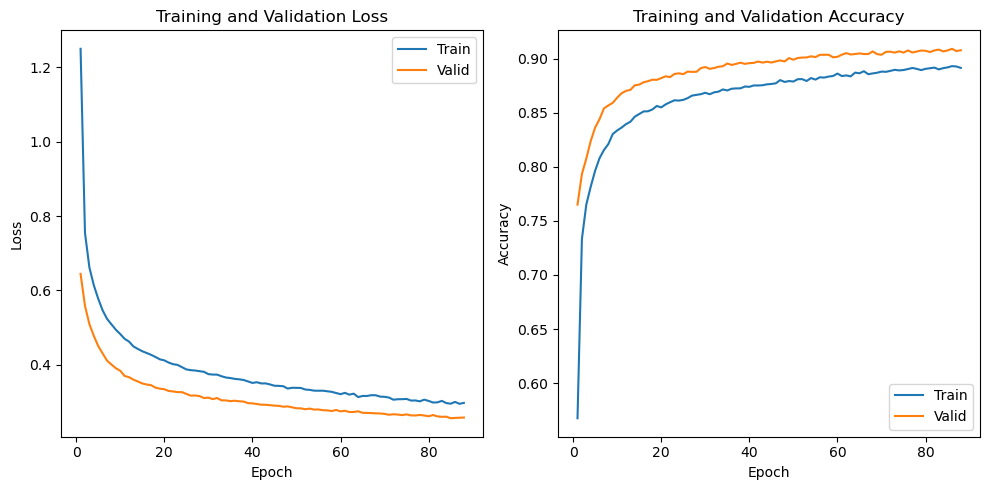

Test Accuracy: 90.33%
Precision: 0.9028
Recall: 0.9033
F1 Score: 0.9023


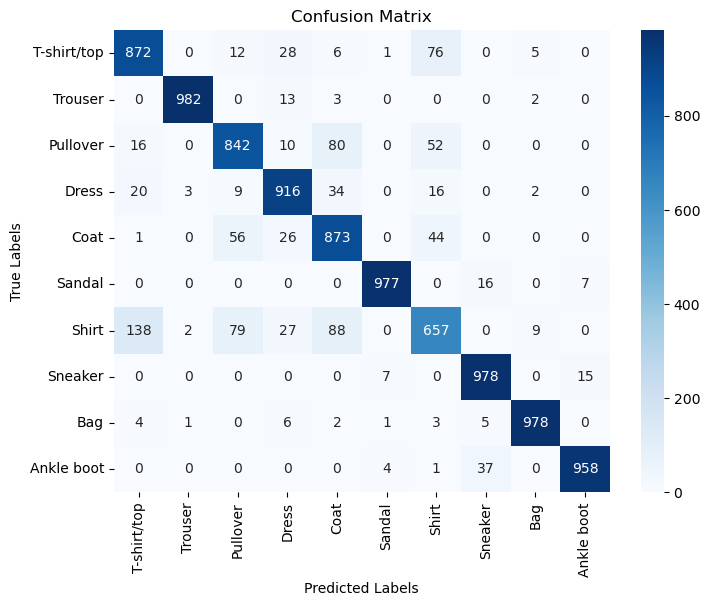

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.0001)

train_and_validate(model2, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model2, test_loader, classes, seed=42)

In [16]:
class FirstCustomCNNL2Regularized(nn.Module):
    def __init__(self, lambda_reg=0.01):
        super(FirstCustomCNNL2Regularized, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.lambda_reg = lambda_reg

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool1(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def l2_regularization_loss(self):
        l2_loss = 0.0
        for param in self.parameters():
            l2_loss += torch.norm(param)**2
        return 0.5 * self.lambda_reg * l2_loss

# Creazione dell'istanza del modello con regolarizzazione L2
model3 = FirstCustomCNNL2Regularized(lambda_reg=0.01)

Epoch [1/50], Train Loss: 0.8244, Train Acc: 72.99%, Valid Loss: 0.5391, Valid Acc: 80.58%
Epoch [2/50], Train Loss: 0.4965, Train Acc: 81.84%, Valid Loss: 0.4734, Valid Acc: 83.27%
Epoch [3/50], Train Loss: 0.4372, Train Acc: 84.41%, Valid Loss: 0.4375, Valid Acc: 84.18%
Epoch [4/50], Train Loss: 0.4002, Train Acc: 85.90%, Valid Loss: 0.4021, Valid Acc: 86.02%
Epoch [5/50], Train Loss: 0.3752, Train Acc: 86.88%, Valid Loss: 0.3940, Valid Acc: 85.71%
Epoch [6/50], Train Loss: 0.3562, Train Acc: 87.41%, Valid Loss: 0.3578, Valid Acc: 87.38%
Epoch [7/50], Train Loss: 0.3412, Train Acc: 87.96%, Valid Loss: 0.3548, Valid Acc: 87.35%
Epoch [8/50], Train Loss: 0.3289, Train Acc: 88.25%, Valid Loss: 0.3352, Valid Acc: 88.25%
Epoch [9/50], Train Loss: 0.3192, Train Acc: 88.75%, Valid Loss: 0.3482, Valid Acc: 87.60%
Epoch [10/50], Train Loss: 0.3088, Train Acc: 88.96%, Valid Loss: 0.3231, Valid Acc: 88.92%
Epoch [11/50], Train Loss: 0.3003, Train Acc: 89.37%, Valid Loss: 0.3129, Valid Acc: 89.0

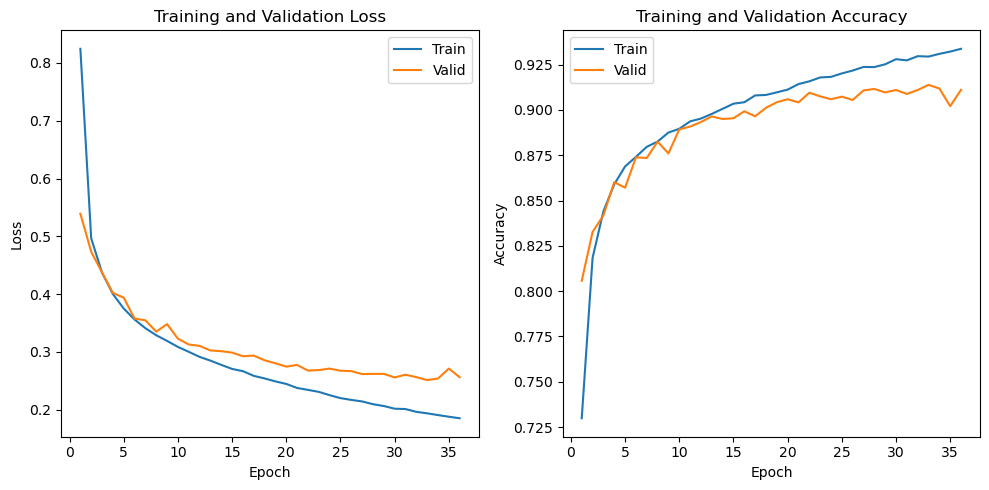

Test Accuracy: 90.45%
Precision: 0.9044
Recall: 0.9045
F1 Score: 0.9025


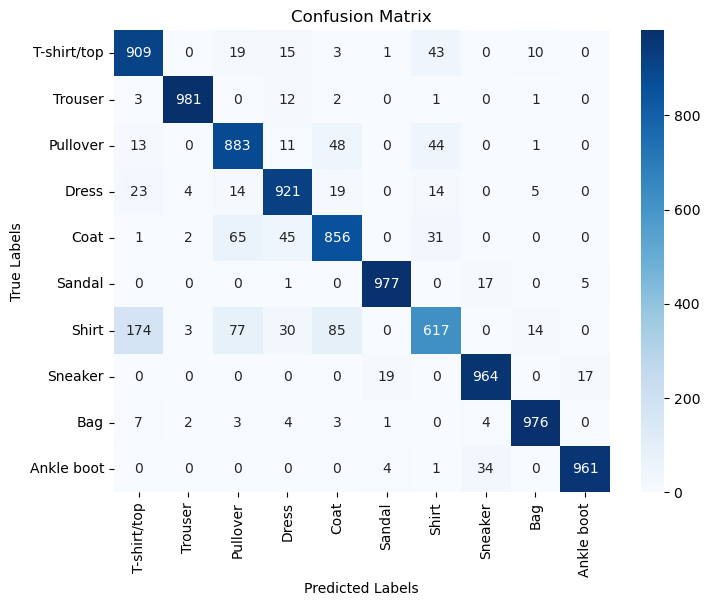

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=0.0001)

train_and_validate(model3, train_loader, valid_loader, criterion, optimizer, num_epochs=50, patience=3, plot=True, seed=42)

test_model(model3, test_loader, classes, seed=42)

In [18]:
class CustomCNN_BN(nn.Module):
    def __init__(self):
        super(CustomCNN_BN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  # Batch normalization dopo il primo layer convoluzionale
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  # Batch normalization dopo il secondo layer convoluzionale
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.bn3 = nn.BatchNorm1d(128)  # Batch normalization dopo il primo layer completamente connesso
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.bn3(self.fc1(x)))
        x = self.fc2(x)
        return x

Epoch [1/100], Train Loss: 0.6011, Train Acc: 83.44%, Valid Loss: 0.3796, Valid Acc: 88.24%
Epoch [2/100], Train Loss: 0.3282, Train Acc: 89.43%, Valid Loss: 0.3017, Valid Acc: 90.05%
Epoch [3/100], Train Loss: 0.2676, Train Acc: 90.87%, Valid Loss: 0.2806, Valid Acc: 90.02%
Epoch [4/100], Train Loss: 0.2320, Train Acc: 92.00%, Valid Loss: 0.2642, Valid Acc: 90.83%
Epoch [5/100], Train Loss: 0.2056, Train Acc: 92.86%, Valid Loss: 0.2479, Valid Acc: 91.26%
Epoch [6/100], Train Loss: 0.1835, Train Acc: 93.70%, Valid Loss: 0.2458, Valid Acc: 91.33%
Epoch [7/100], Train Loss: 0.1650, Train Acc: 94.38%, Valid Loss: 0.2449, Valid Acc: 91.20%
Epoch [8/100], Train Loss: 0.1475, Train Acc: 95.01%, Valid Loss: 0.2471, Valid Acc: 91.34%
Epoch [9/100], Train Loss: 0.1338, Train Acc: 95.55%, Valid Loss: 0.2505, Valid Acc: 91.11%
Epoch [10/100], Train Loss: 0.1206, Train Acc: 96.04%, Valid Loss: 0.2464, Valid Acc: 91.38%
No improvement in validation loss for 3 epochs. Early stopping...


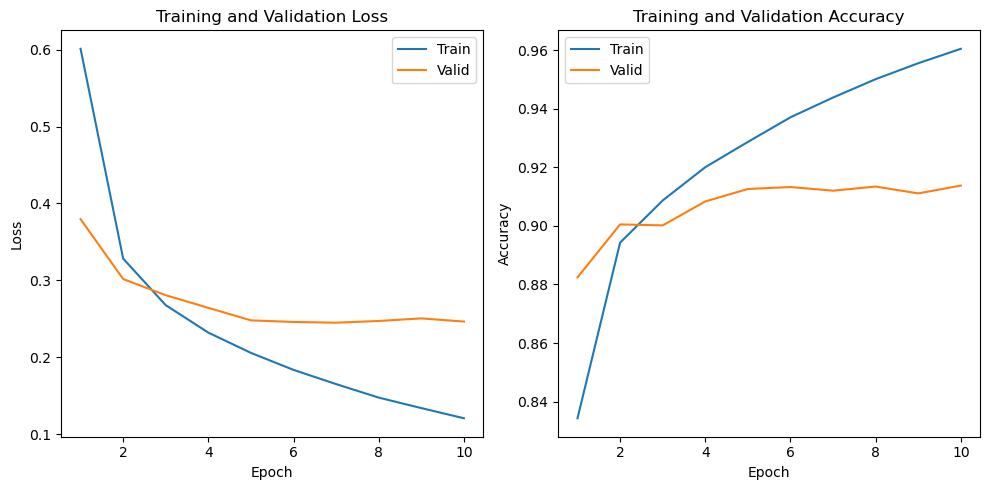

Test Accuracy: 90.85%
Precision: 0.9084
Recall: 0.9085
F1 Score: 0.9083


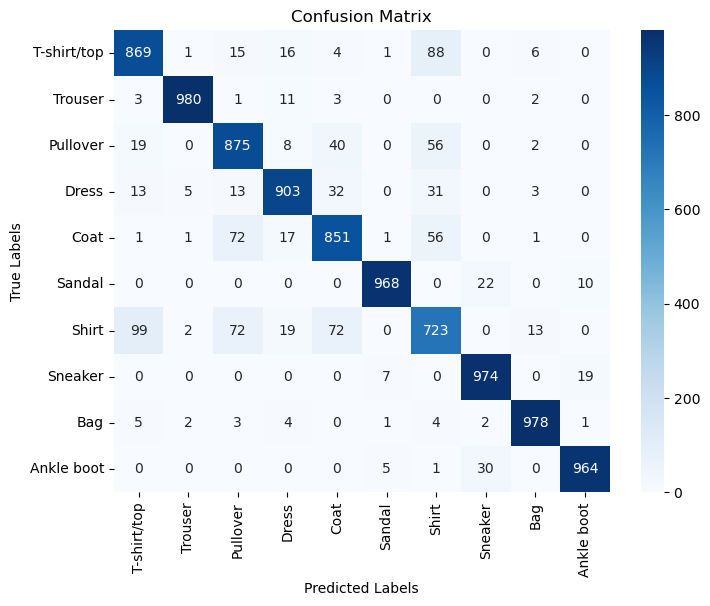

In [19]:
model4 = CustomCNN_BN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model4.parameters(), lr=0.0001)

train_and_validate(model4, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model4, test_loader, classes, seed=42)


In [34]:
class CustomCNN_BN_dropout(nn.Module):
    def __init__(self):
        super(CustomCNN_BN_dropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  # Batch normalization dopo il primo layer convoluzionale
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  # Batch normalization dopo il secondo layer convoluzionale
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
        

Epoch [1/100], Train Loss: 0.7572, Train Acc: 74.73%, Valid Loss: 0.4330, Valid Acc: 85.05%
Epoch [2/100], Train Loss: 0.4501, Train Acc: 84.39%, Valid Loss: 0.3643, Valid Acc: 87.38%
Epoch [3/100], Train Loss: 0.3848, Train Acc: 86.65%, Valid Loss: 0.3289, Valid Acc: 88.29%
Epoch [4/100], Train Loss: 0.3483, Train Acc: 87.65%, Valid Loss: 0.3145, Valid Acc: 88.78%
Epoch [5/100], Train Loss: 0.3248, Train Acc: 88.54%, Valid Loss: 0.3038, Valid Acc: 88.96%
Epoch [6/100], Train Loss: 0.3059, Train Acc: 89.24%, Valid Loss: 0.2887, Valid Acc: 89.40%
Epoch [7/100], Train Loss: 0.2904, Train Acc: 89.69%, Valid Loss: 0.2782, Valid Acc: 89.83%
Epoch [8/100], Train Loss: 0.2787, Train Acc: 89.94%, Valid Loss: 0.2742, Valid Acc: 90.23%
Epoch [9/100], Train Loss: 0.2684, Train Acc: 90.41%, Valid Loss: 0.2742, Valid Acc: 90.07%
Epoch [10/100], Train Loss: 0.2559, Train Acc: 90.94%, Valid Loss: 0.2644, Valid Acc: 90.61%
Epoch [11/100], Train Loss: 0.2502, Train Acc: 91.05%, Valid Loss: 0.2581, Vali

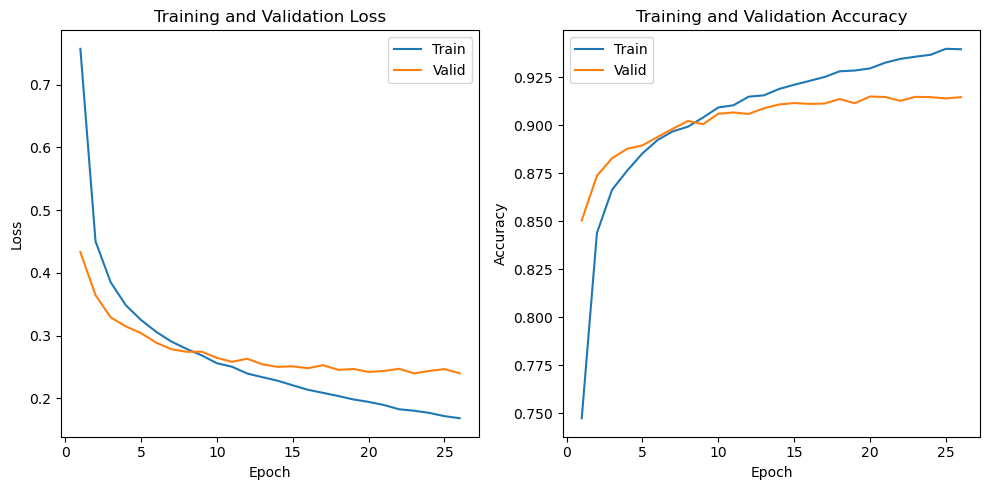

Test Accuracy: 91.16%
Precision: 0.9117
Recall: 0.9116
F1 Score: 0.9114


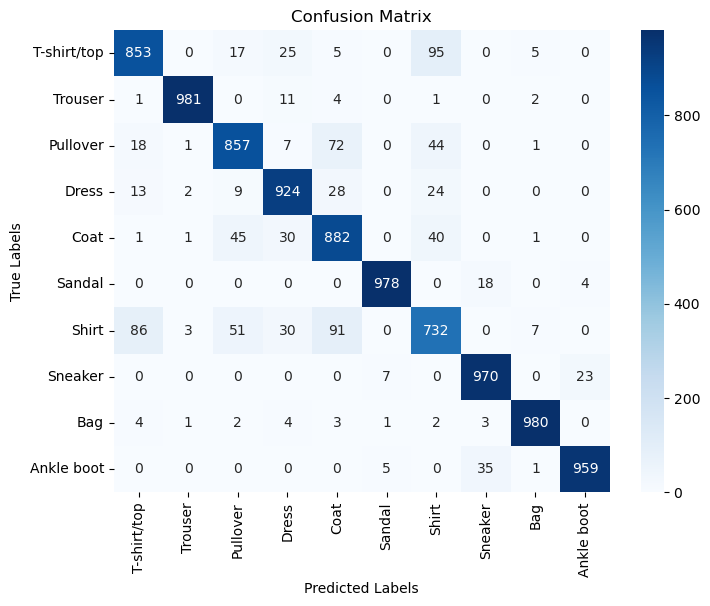

In [35]:
model5 = CustomCNN_BN_dropout()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model5.parameters(), lr=0.0001)

train_and_validate(model5, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model5, test_loader, classes, seed=42)

### Second CNN

piu profonda

In [58]:
class SecondCustomCNN(nn.Module):
    def __init__(self):
        super(SecondCustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool(x)
        x = x.view(-1, 128 * 7 * 7)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        return x
    
model_deep = SecondCustomCNN()

Epoch [1/100], Train Loss: 0.6008, Train Acc: 78.68%, Valid Loss: 0.4291, Valid Acc: 84.53%
Epoch [2/100], Train Loss: 0.3799, Train Acc: 86.27%, Valid Loss: 0.3728, Valid Acc: 86.95%
Epoch [3/100], Train Loss: 0.3303, Train Acc: 88.10%, Valid Loss: 0.4143, Valid Acc: 85.42%
Epoch [4/100], Train Loss: 0.2968, Train Acc: 89.19%, Valid Loss: 0.3210, Valid Acc: 88.48%
Epoch [5/100], Train Loss: 0.2721, Train Acc: 90.17%, Valid Loss: 0.2955, Valid Acc: 89.20%
Epoch [6/100], Train Loss: 0.2511, Train Acc: 90.76%, Valid Loss: 0.2668, Valid Acc: 90.50%
Epoch [7/100], Train Loss: 0.2349, Train Acc: 91.36%, Valid Loss: 0.2710, Valid Acc: 90.09%
Epoch [8/100], Train Loss: 0.2206, Train Acc: 91.76%, Valid Loss: 0.2451, Valid Acc: 91.09%
Epoch [9/100], Train Loss: 0.2079, Train Acc: 92.36%, Valid Loss: 0.2595, Valid Acc: 90.53%
Epoch [10/100], Train Loss: 0.1932, Train Acc: 92.86%, Valid Loss: 0.2364, Valid Acc: 91.57%
Epoch [11/100], Train Loss: 0.1818, Train Acc: 93.29%, Valid Loss: 0.2288, Vali

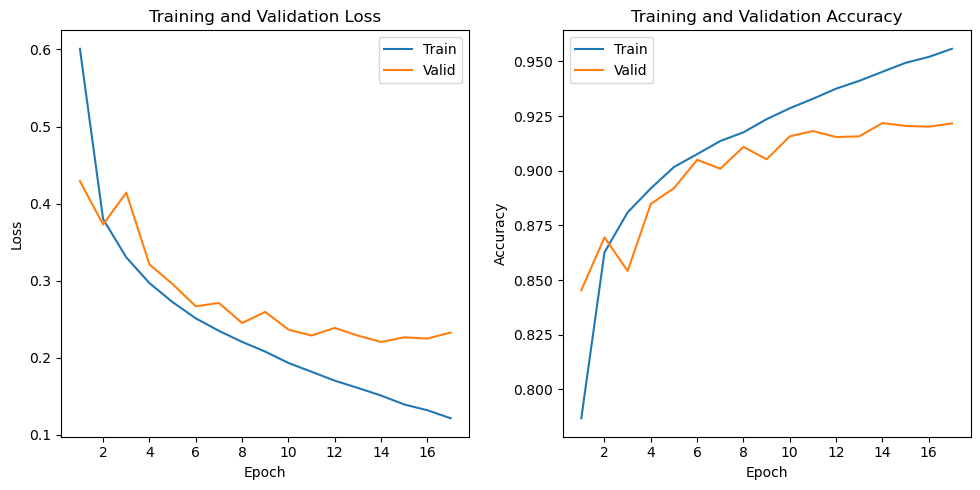

Test Accuracy: 92.25%
Precision: 0.9231
Recall: 0.9225
F1 Score: 0.9215


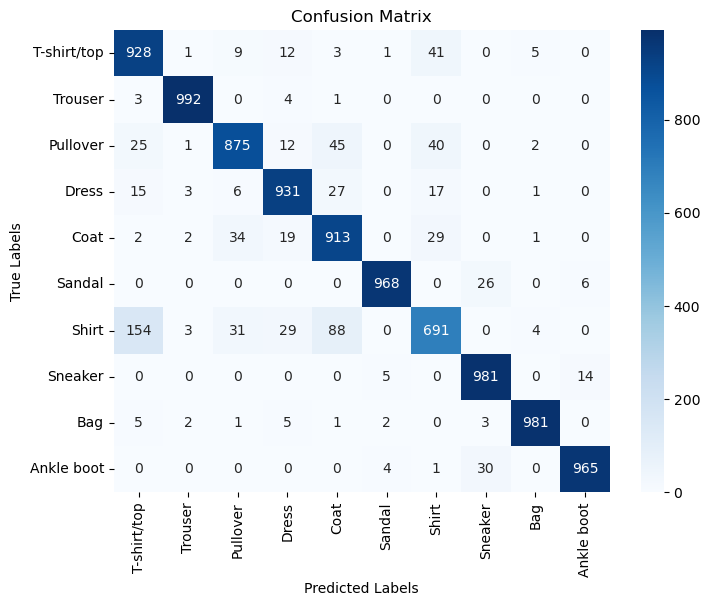

In [59]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deep.parameters(), lr=0.0001)

train_and_validate(model_deep, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_deep, test_loader, classes, seed=42)

In [54]:
class SecondCustomCNNWithDropout(nn.Module):
    def __init__(self, dropout_prob_conv=0.1, dropout_prob_fc=0.5):
        super(SecondCustomCNNWithDropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout2d(dropout_prob_conv)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout2d(dropout_prob_conv)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.relu4 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout_prob_fc)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool(x)
        x = x.view(-1, 128 * 7 * 7)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout3(x)
        x = self.fc2(x)
        return x
    
model_deep_2 = SecondCustomCNNWithDropout()

Epoch [1/100], Train Loss: 0.7256, Train Acc: 73.88%, Valid Loss: 0.4372, Valid Acc: 84.39%
Epoch [2/100], Train Loss: 0.4533, Train Acc: 83.74%, Valid Loss: 0.3765, Valid Acc: 86.49%
Epoch [3/100], Train Loss: 0.3924, Train Acc: 85.93%, Valid Loss: 0.3423, Valid Acc: 87.61%
Epoch [4/100], Train Loss: 0.3571, Train Acc: 87.03%, Valid Loss: 0.3241, Valid Acc: 88.13%
Epoch [5/100], Train Loss: 0.3332, Train Acc: 88.00%, Valid Loss: 0.3039, Valid Acc: 88.75%
Epoch [6/100], Train Loss: 0.3100, Train Acc: 88.73%, Valid Loss: 0.2831, Valid Acc: 89.77%
Epoch [7/100], Train Loss: 0.2908, Train Acc: 89.46%, Valid Loss: 0.2751, Valid Acc: 90.11%
Epoch [8/100], Train Loss: 0.2777, Train Acc: 89.90%, Valid Loss: 0.2639, Valid Acc: 90.54%
Epoch [9/100], Train Loss: 0.2667, Train Acc: 90.11%, Valid Loss: 0.2624, Valid Acc: 90.29%
Epoch [10/100], Train Loss: 0.2531, Train Acc: 90.82%, Valid Loss: 0.2512, Valid Acc: 90.91%
Epoch [11/100], Train Loss: 0.2430, Train Acc: 91.10%, Valid Loss: 0.2427, Vali

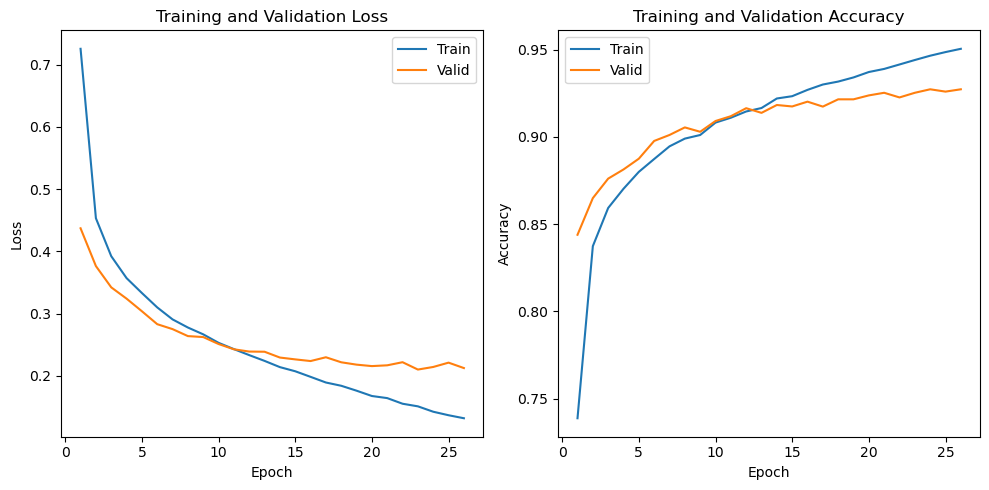

Test Accuracy: 92.30%
Precision: 0.9226
Recall: 0.9230
F1 Score: 0.9225


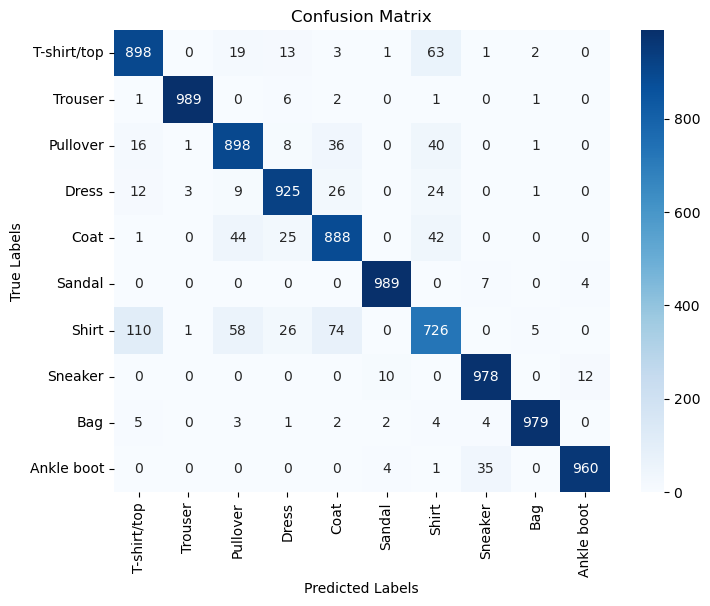

In [55]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deep_2.parameters(), lr=0.0001)

train_and_validate(model_deep_2, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_deep_2, test_loader, classes, seed=42)

In [56]:
class SecondCustomCNNWithDropout2(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super(SecondCustomCNNWithDropout2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool(x)
        x = x.view(-1, 128 * 7 * 7)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
model_deep_3 = SecondCustomCNNWithDropout2()

Epoch [1/100], Train Loss: 0.7035, Train Acc: 74.73%, Valid Loss: 0.4465, Valid Acc: 83.56%
Epoch [2/100], Train Loss: 0.4410, Train Acc: 83.84%, Valid Loss: 0.3683, Valid Acc: 86.91%
Epoch [3/100], Train Loss: 0.3783, Train Acc: 86.31%, Valid Loss: 0.3369, Valid Acc: 87.85%
Epoch [4/100], Train Loss: 0.3450, Train Acc: 87.54%, Valid Loss: 0.3153, Valid Acc: 88.55%
Epoch [5/100], Train Loss: 0.3181, Train Acc: 88.25%, Valid Loss: 0.2977, Valid Acc: 88.90%
Epoch [6/100], Train Loss: 0.2987, Train Acc: 89.03%, Valid Loss: 0.2787, Valid Acc: 89.76%
Epoch [7/100], Train Loss: 0.2806, Train Acc: 89.75%, Valid Loss: 0.2698, Valid Acc: 90.10%
Epoch [8/100], Train Loss: 0.2671, Train Acc: 90.20%, Valid Loss: 0.2599, Valid Acc: 90.81%
Epoch [9/100], Train Loss: 0.2560, Train Acc: 90.69%, Valid Loss: 0.2578, Valid Acc: 90.53%
Epoch [10/100], Train Loss: 0.2426, Train Acc: 91.06%, Valid Loss: 0.2450, Valid Acc: 90.98%
Epoch [11/100], Train Loss: 0.2324, Train Acc: 91.50%, Valid Loss: 0.2382, Vali

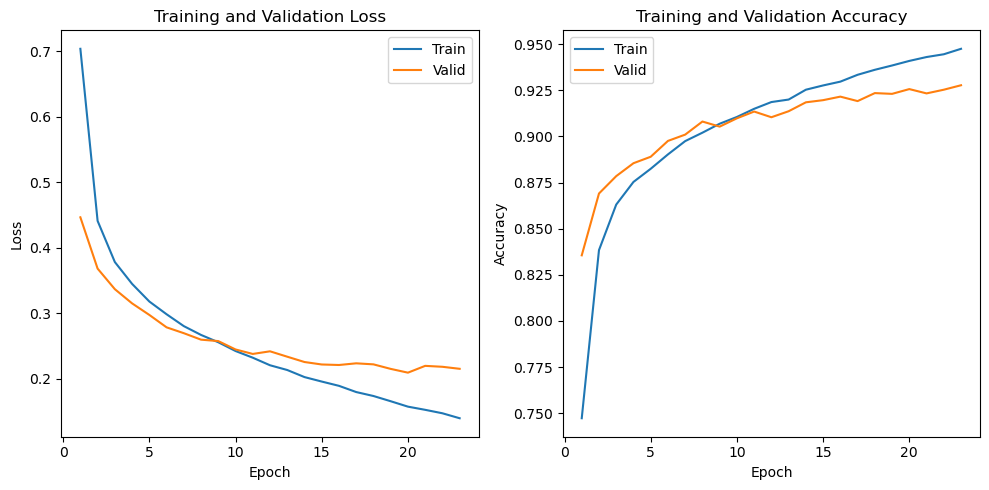

Test Accuracy: 92.24%
Precision: 0.9220
Recall: 0.9224
F1 Score: 0.9218


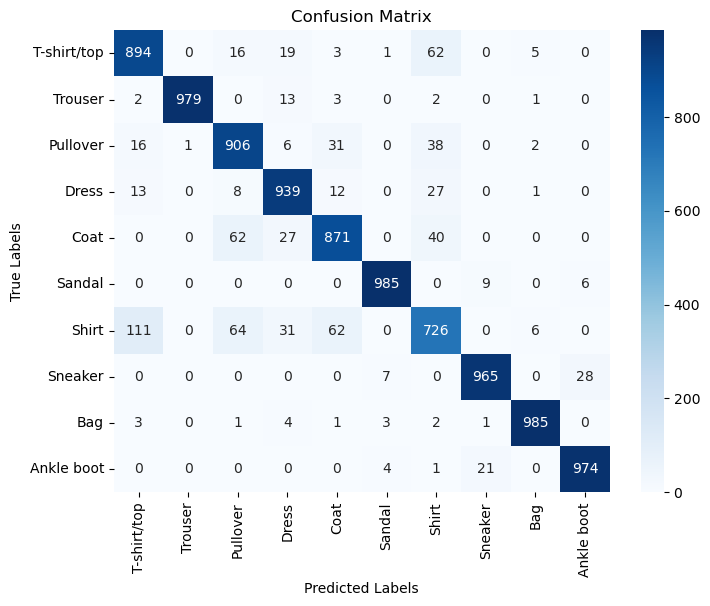

In [57]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deep_3.parameters(), lr=0.0001)

train_and_validate(model_deep_3, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_deep_3, test_loader, classes, seed=42)

In [60]:
class SecondCustomCNNWithBatchNorm(nn.Module):
    def __init__(self):
        super(SecondCustomCNNWithBatchNorm, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool(x)
        x = x.view(-1, 128 * 7 * 7)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        return x
    
model_deep_4 = SecondCustomCNNWithBatchNorm()

Epoch [1/100], Train Loss: 0.4024, Train Acc: 85.89%, Valid Loss: 0.3201, Valid Acc: 88.74%
Epoch [2/100], Train Loss: 0.2611, Train Acc: 90.69%, Valid Loss: 0.2619, Valid Acc: 90.66%
Epoch [3/100], Train Loss: 0.2146, Train Acc: 92.36%, Valid Loss: 0.3023, Valid Acc: 89.60%
Epoch [4/100], Train Loss: 0.1847, Train Acc: 93.36%, Valid Loss: 0.2743, Valid Acc: 90.47%
Epoch [5/100], Train Loss: 0.1544, Train Acc: 94.45%, Valid Loss: 0.2578, Valid Acc: 90.67%
Epoch [6/100], Train Loss: 0.1346, Train Acc: 95.19%, Valid Loss: 0.2416, Valid Acc: 91.57%
Epoch [7/100], Train Loss: 0.1124, Train Acc: 95.99%, Valid Loss: 0.2487, Valid Acc: 91.64%
Epoch [8/100], Train Loss: 0.0937, Train Acc: 96.74%, Valid Loss: 0.2562, Valid Acc: 91.51%
Epoch [9/100], Train Loss: 0.0770, Train Acc: 97.37%, Valid Loss: 0.3053, Valid Acc: 90.78%
No improvement in validation loss for 3 epochs. Early stopping...


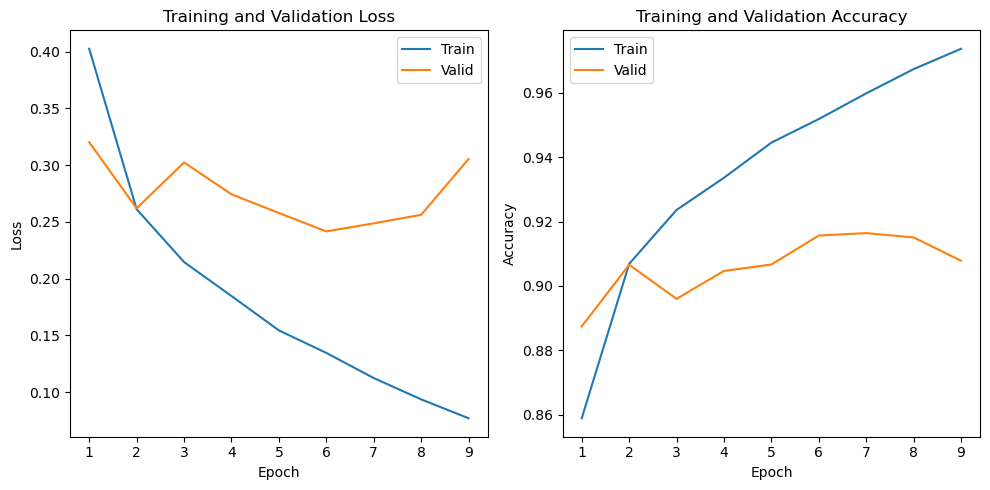

Test Accuracy: 90.56%
Precision: 0.9119
Recall: 0.9056
F1 Score: 0.9040


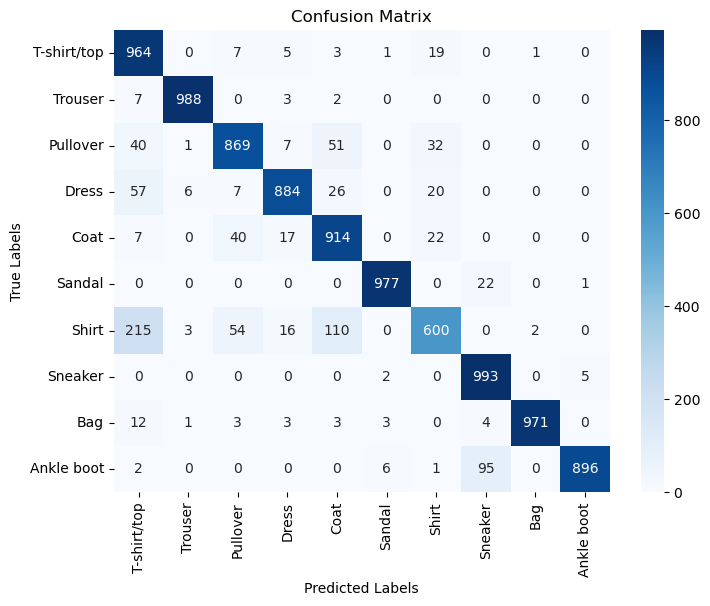

In [61]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deep_4.parameters(), lr=0.0001)

train_and_validate(model_deep_4, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_deep_4, test_loader, classes, seed=42)

In [62]:
class SecondCustomCNNWithBatchNormAndDropout(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super(SecondCustomCNNWithBatchNormAndDropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool(x)
        x = x.view(-1, 128 * 7 * 7)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
model_deep_5 = SecondCustomCNNWithBatchNormAndDropout()

Epoch [1/100], Train Loss: 0.4980, Train Acc: 82.41%, Valid Loss: 0.3355, Valid Acc: 88.16%
Epoch [2/100], Train Loss: 0.3213, Train Acc: 88.45%, Valid Loss: 0.2775, Valid Acc: 90.13%
Epoch [3/100], Train Loss: 0.2713, Train Acc: 90.16%, Valid Loss: 0.2687, Valid Acc: 90.20%
Epoch [4/100], Train Loss: 0.2431, Train Acc: 91.15%, Valid Loss: 0.2592, Valid Acc: 90.17%
Epoch [5/100], Train Loss: 0.2191, Train Acc: 92.10%, Valid Loss: 0.2278, Valid Acc: 91.43%
Epoch [6/100], Train Loss: 0.2019, Train Acc: 92.76%, Valid Loss: 0.2233, Valid Acc: 91.72%
Epoch [7/100], Train Loss: 0.1803, Train Acc: 93.37%, Valid Loss: 0.2184, Valid Acc: 91.92%
Epoch [8/100], Train Loss: 0.1672, Train Acc: 93.94%, Valid Loss: 0.2131, Valid Acc: 92.43%
Epoch [9/100], Train Loss: 0.1526, Train Acc: 94.42%, Valid Loss: 0.2310, Valid Acc: 91.86%
Epoch [10/100], Train Loss: 0.1402, Train Acc: 94.99%, Valid Loss: 0.2089, Valid Acc: 92.36%
Epoch [11/100], Train Loss: 0.1277, Train Acc: 95.34%, Valid Loss: 0.2230, Vali

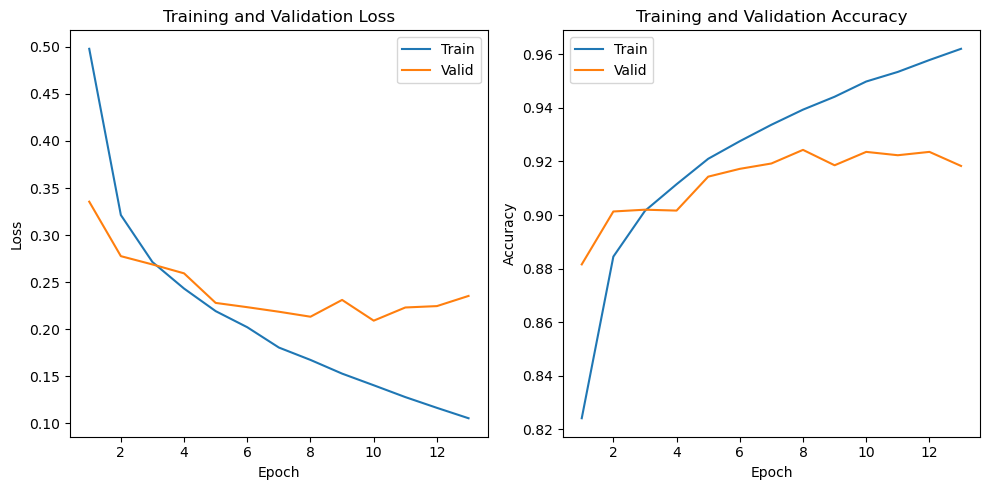

Test Accuracy: 91.68%
Precision: 0.9184
Recall: 0.9168
F1 Score: 0.9171


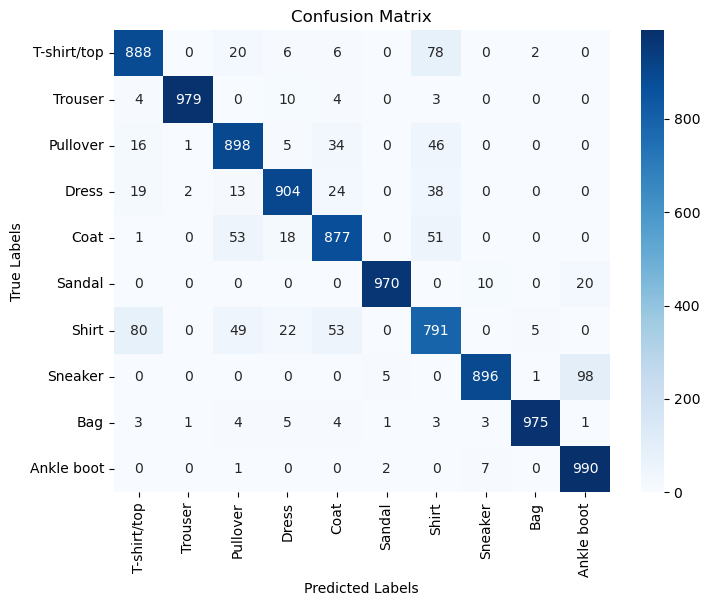

In [63]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deep_5.parameters(), lr=0.0001)

train_and_validate(model_deep_5, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_deep_5, test_loader, classes, seed=42)

### terza rete
è la seconda con un conv in piu

In [65]:
class ThirdCNN(nn.Module):
    def __init__(self):
        super(ThirdCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 7 * 7, 256)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool(x)
        x = x.view(-1, 256 * 7 * 7)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.fc2(x)
        return x
    
model_third = ThirdCNN()

Epoch [1/100], Train Loss: 0.5827, Train Acc: 78.90%, Valid Loss: 0.4129, Valid Acc: 84.95%
Epoch [2/100], Train Loss: 0.3604, Train Acc: 86.87%, Valid Loss: 0.3351, Valid Acc: 88.29%
Epoch [3/100], Train Loss: 0.3060, Train Acc: 88.87%, Valid Loss: 0.3797, Valid Acc: 86.54%
Epoch [4/100], Train Loss: 0.2717, Train Acc: 90.00%, Valid Loss: 0.2987, Valid Acc: 89.42%
Epoch [5/100], Train Loss: 0.2451, Train Acc: 91.04%, Valid Loss: 0.2743, Valid Acc: 90.05%
Epoch [6/100], Train Loss: 0.2225, Train Acc: 91.71%, Valid Loss: 0.2461, Valid Acc: 91.27%
Epoch [7/100], Train Loss: 0.2031, Train Acc: 92.48%, Valid Loss: 0.2489, Valid Acc: 91.15%
Epoch [8/100], Train Loss: 0.1844, Train Acc: 93.21%, Valid Loss: 0.2219, Valid Acc: 91.85%
Epoch [9/100], Train Loss: 0.1682, Train Acc: 93.81%, Valid Loss: 0.2368, Valid Acc: 91.58%
Epoch [10/100], Train Loss: 0.1523, Train Acc: 94.46%, Valid Loss: 0.2157, Valid Acc: 92.28%
Epoch [11/100], Train Loss: 0.1375, Train Acc: 94.97%, Valid Loss: 0.2193, Vali

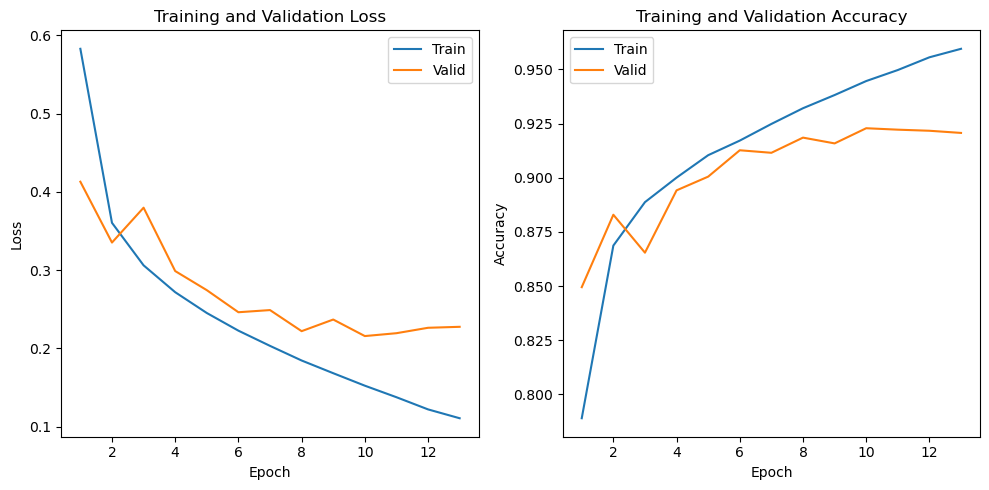

Test Accuracy: 92.11%
Precision: 0.9217
Recall: 0.9211
F1 Score: 0.9213


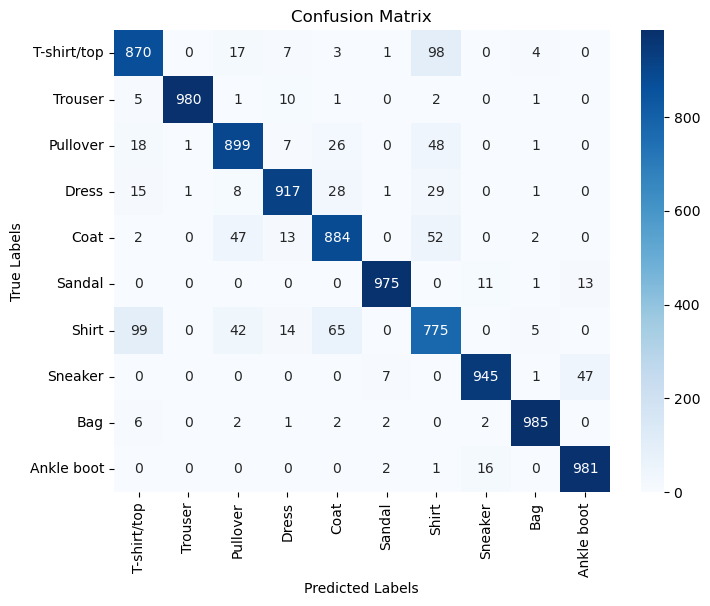

In [66]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_third.parameters(), lr=0.0001)

train_and_validate(model_third, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_third, test_loader, classes, seed=42)

In [67]:
class ThirdCNNWithL2Regularization(nn.Module):
    def __init__(self, reg_lambda=0.01):
        super(ThirdCNNWithL2Regularization, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 7 * 7, 256)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)
        self.reg_lambda = reg_lambda

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool(x)
        x = x.view(-1, 256 * 7 * 7)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.fc2(x)
        return x

    def l2_regularization(self):
        l2_reg = 0.0
        for param in self.parameters():
            l2_reg += torch.norm(param)**2
        return self.reg_lambda * l2_reg
    
model_third_l2 = ThirdCNNWithL2Regularization()

Epoch [1/100], Train Loss: 0.5827, Train Acc: 78.86%, Valid Loss: 0.4102, Valid Acc: 84.84%
Epoch [2/100], Train Loss: 0.3608, Train Acc: 86.89%, Valid Loss: 0.3334, Valid Acc: 88.38%
Epoch [3/100], Train Loss: 0.3067, Train Acc: 88.92%, Valid Loss: 0.3635, Valid Acc: 86.88%
Epoch [4/100], Train Loss: 0.2723, Train Acc: 89.94%, Valid Loss: 0.2983, Valid Acc: 89.49%
Epoch [5/100], Train Loss: 0.2458, Train Acc: 90.94%, Valid Loss: 0.2709, Valid Acc: 90.08%
Epoch [6/100], Train Loss: 0.2226, Train Acc: 91.74%, Valid Loss: 0.2484, Valid Acc: 91.09%
Epoch [7/100], Train Loss: 0.2032, Train Acc: 92.47%, Valid Loss: 0.2474, Valid Acc: 90.95%
Epoch [8/100], Train Loss: 0.1847, Train Acc: 93.17%, Valid Loss: 0.2215, Valid Acc: 91.86%
Epoch [9/100], Train Loss: 0.1684, Train Acc: 93.83%, Valid Loss: 0.2403, Valid Acc: 91.52%
Epoch [10/100], Train Loss: 0.1525, Train Acc: 94.33%, Valid Loss: 0.2189, Valid Acc: 92.14%
Epoch [11/100], Train Loss: 0.1380, Train Acc: 94.95%, Valid Loss: 0.2244, Vali

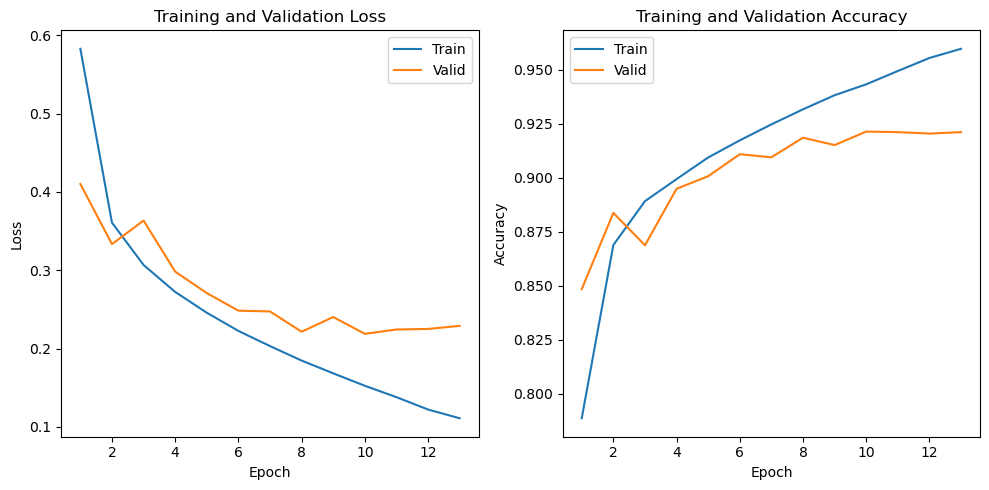

Test Accuracy: 91.90%
Precision: 0.9196
Recall: 0.9190
F1 Score: 0.9191


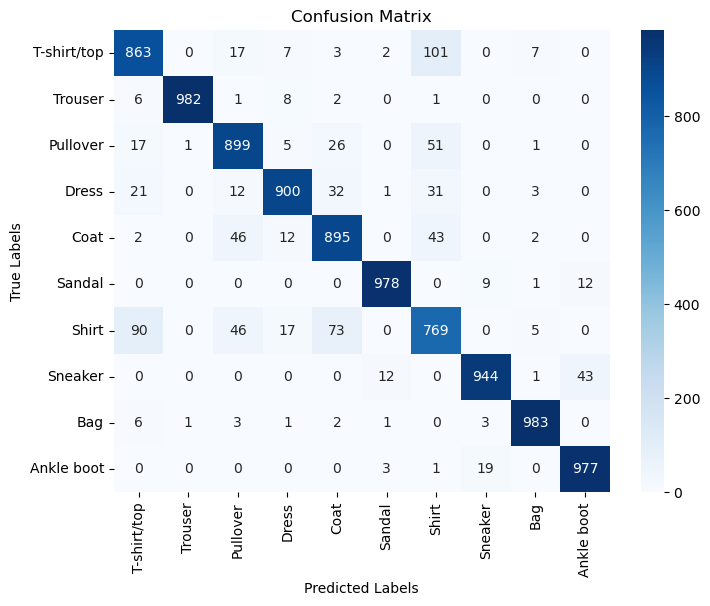

In [68]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_third_l2.parameters(), lr=0.0001)

train_and_validate(model_third_l2, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_third_l2, test_loader, classes, seed=42)

In [69]:
class ThirdCNNWithDropout(nn.Module):
    def __init__(self, dropout_prob_conv=0.1, dropout_prob_fc=0.5):
        super(ThirdCNNWithDropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout2d(dropout_prob_conv)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.dropout2 = nn.Dropout2d(dropout_prob_conv)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.dropout3 = nn.Dropout2d(dropout_prob_conv)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.dropout4 = nn.Dropout2d(dropout_prob_conv)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 7 * 7, 256)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)
        self.dropout_fc = nn.Dropout(dropout_prob_fc)

    def forward(self, x):
        x = self.conv1(x)
        x = self.dropout1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.dropout2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.dropout3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.dropout4(x)
        x = self.relu4(x)
        x = self.pool(x)
        x = x.view(-1, 256 * 7 * 7)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.dropout_fc(x)
        x = self.fc2(x)
        return x
    
model_third_dropout = ThirdCNNWithDropout()

Epoch [1/100], Train Loss: 0.7183, Train Acc: 74.16%, Valid Loss: 0.4241, Valid Acc: 84.60%
Epoch [2/100], Train Loss: 0.4357, Train Acc: 84.34%, Valid Loss: 0.3469, Valid Acc: 87.53%
Epoch [3/100], Train Loss: 0.3755, Train Acc: 86.43%, Valid Loss: 0.3234, Valid Acc: 88.24%
Epoch [4/100], Train Loss: 0.3399, Train Acc: 87.78%, Valid Loss: 0.3016, Valid Acc: 88.96%
Epoch [5/100], Train Loss: 0.3157, Train Acc: 88.53%, Valid Loss: 0.2850, Valid Acc: 89.58%
Epoch [6/100], Train Loss: 0.2943, Train Acc: 89.31%, Valid Loss: 0.2680, Valid Acc: 90.03%
Epoch [7/100], Train Loss: 0.2759, Train Acc: 89.99%, Valid Loss: 0.2506, Valid Acc: 90.94%
Epoch [8/100], Train Loss: 0.2604, Train Acc: 90.45%, Valid Loss: 0.2437, Valid Acc: 91.18%
Epoch [9/100], Train Loss: 0.2470, Train Acc: 90.94%, Valid Loss: 0.2476, Valid Acc: 90.97%
Epoch [10/100], Train Loss: 0.2340, Train Acc: 91.43%, Valid Loss: 0.2362, Valid Acc: 91.46%
Epoch [11/100], Train Loss: 0.2231, Train Acc: 91.85%, Valid Loss: 0.2259, Vali

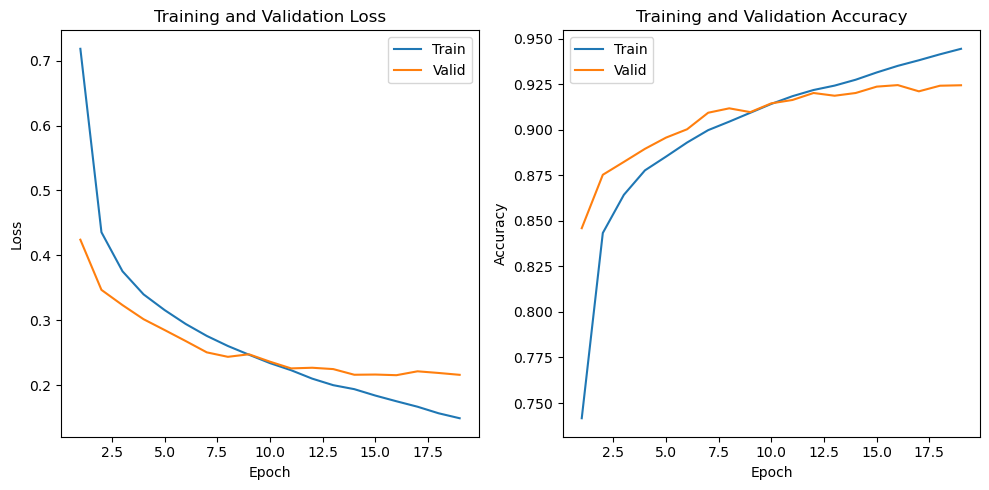

Test Accuracy: 92.22%
Precision: 0.9221
Recall: 0.9222
F1 Score: 0.9219


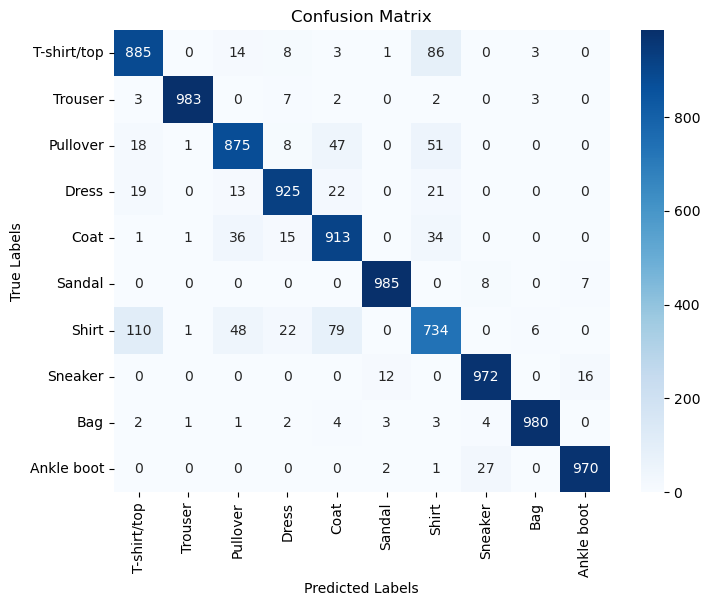

In [70]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_third_dropout.parameters(), lr=0.0001)

train_and_validate(model_third_dropout, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_third_dropout, test_loader, classes, seed=42)

In [71]:
class ThirdCNNWithDropoutBetweenFc(nn.Module):
    def __init__(self, dropout_prob_fc=0.5):
        super(ThirdCNNWithDropoutBetweenFc, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 7 * 7, 256)
        self.relu5 = nn.ReLU()
        self.dropout_fc = nn.Dropout(dropout_prob_fc)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool(x)
        x = x.view(-1, 256 * 7 * 7)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.fc2(x)
        x = self.dropout_fc(x)
        return x
    
model_third_dropout_fc = ThirdCNNWithDropoutBetweenFc()

Epoch [1/100], Train Loss: 1.3003, Train Acc: 48.20%, Valid Loss: 0.5176, Valid Acc: 84.62%
Epoch [2/100], Train Loss: 1.1314, Train Acc: 53.31%, Valid Loss: 0.3953, Valid Acc: 87.50%
Epoch [3/100], Train Loss: 1.1021, Train Acc: 53.45%, Valid Loss: 0.3767, Valid Acc: 87.47%
Epoch [4/100], Train Loss: 1.0717, Train Acc: 54.27%, Valid Loss: 0.3253, Valid Acc: 89.59%
Epoch [5/100], Train Loss: 1.0568, Train Acc: 54.77%, Valid Loss: 0.3107, Valid Acc: 89.35%
Epoch [6/100], Train Loss: 1.0395, Train Acc: 55.05%, Valid Loss: 0.2919, Valid Acc: 90.37%
Epoch [7/100], Train Loss: 1.0218, Train Acc: 55.59%, Valid Loss: 0.2883, Valid Acc: 90.21%
Epoch [8/100], Train Loss: 1.0064, Train Acc: 56.25%, Valid Loss: 0.2580, Valid Acc: 91.48%
Epoch [9/100], Train Loss: 0.9949, Train Acc: 56.09%, Valid Loss: 0.2622, Valid Acc: 90.92%
Epoch [10/100], Train Loss: 0.9946, Train Acc: 56.12%, Valid Loss: 0.2547, Valid Acc: 91.57%
Epoch [11/100], Train Loss: 0.9748, Train Acc: 56.75%, Valid Loss: 0.2346, Vali

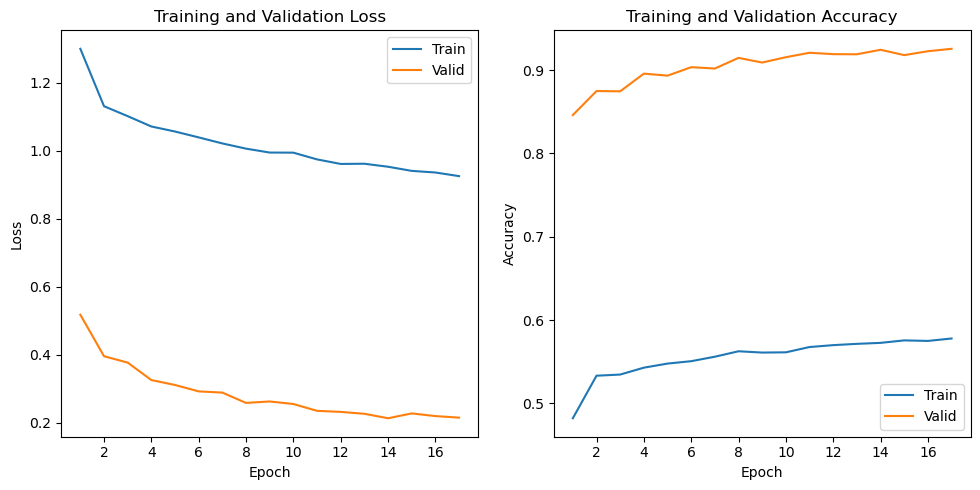

Test Accuracy: 92.40%
Precision: 0.9240
Recall: 0.9240
F1 Score: 0.9237


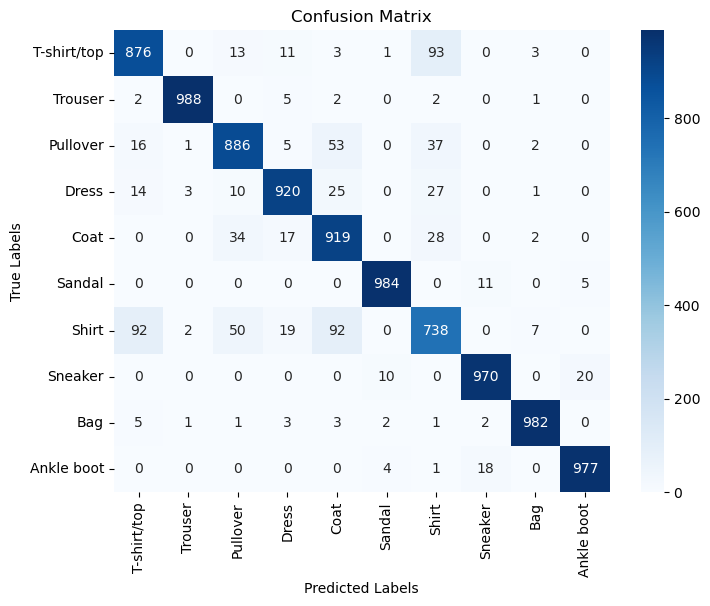

In [72]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_third_dropout_fc.parameters(), lr=0.0001)

train_and_validate(model_third_dropout_fc, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_third_dropout_fc, test_loader, classes, seed=42)

In [73]:
class ThirdCNNWithBatchNorm(nn.Module):
    def __init__(self):
        super(ThirdCNNWithBatchNorm, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 7 * 7, 256)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.pool(x)
        x = x.view(-1, 256 * 7 * 7)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.fc2(x)
        return x
    
model_third_bn = ThirdCNNWithBatchNorm()

Epoch [1/100], Train Loss: 0.3798, Train Acc: 86.52%, Valid Loss: 0.3044, Valid Acc: 88.97%
Epoch [2/100], Train Loss: 0.2401, Train Acc: 91.29%, Valid Loss: 0.2441, Valid Acc: 91.19%
Epoch [3/100], Train Loss: 0.1895, Train Acc: 93.20%, Valid Loss: 0.2622, Valid Acc: 90.92%
Epoch [4/100], Train Loss: 0.1536, Train Acc: 94.46%, Valid Loss: 0.2455, Valid Acc: 91.36%
Epoch [5/100], Train Loss: 0.1169, Train Acc: 95.80%, Valid Loss: 0.2437, Valid Acc: 91.69%
Epoch [6/100], Train Loss: 0.0889, Train Acc: 96.92%, Valid Loss: 0.2393, Valid Acc: 91.88%
Epoch [7/100], Train Loss: 0.0687, Train Acc: 97.69%, Valid Loss: 0.2742, Valid Acc: 92.03%
Epoch [8/100], Train Loss: 0.0545, Train Acc: 98.13%, Valid Loss: 0.2978, Valid Acc: 91.00%
Epoch [9/100], Train Loss: 0.0385, Train Acc: 98.73%, Valid Loss: 0.3329, Valid Acc: 91.00%
No improvement in validation loss for 3 epochs. Early stopping...


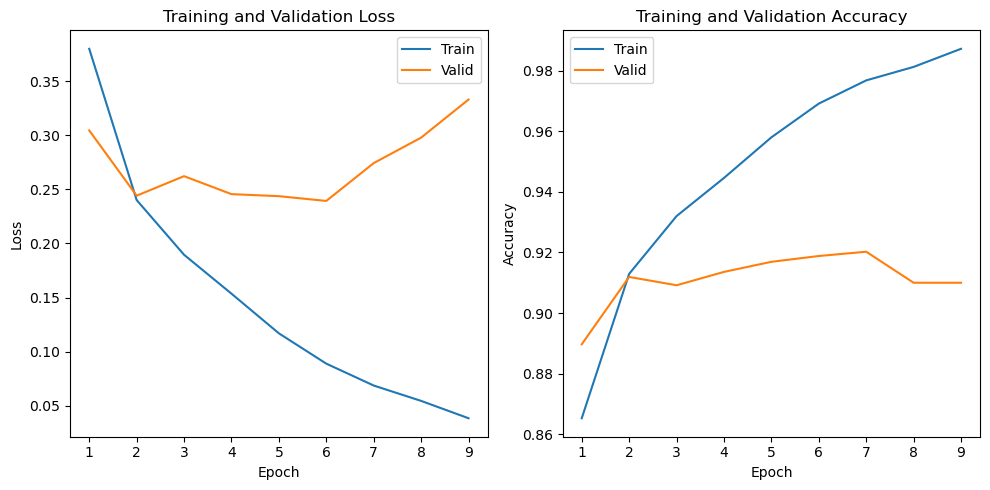

Test Accuracy: 91.07%
Precision: 0.9165
Recall: 0.9107
F1 Score: 0.9075


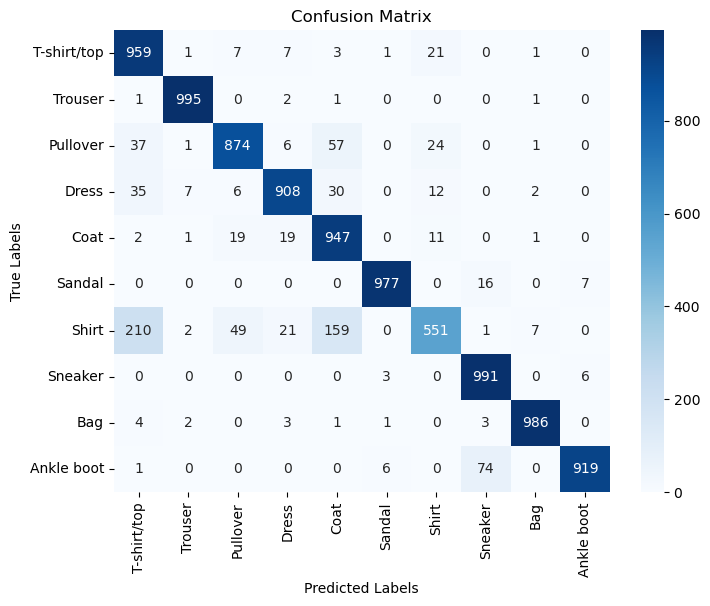

In [74]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_third_bn.parameters(), lr=0.0001)

train_and_validate(model_third_bn, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_third_bn, test_loader, classes, seed=42)

In [75]:
class ThirdCNNWithBatchNormAndDropout(nn.Module):
    def __init__(self, dropout_prob_fc=0.5):
        super(ThirdCNNWithBatchNormAndDropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 7 * 7, 256)
        self.relu5 = nn.ReLU()
        self.dropout_fc = nn.Dropout(dropout_prob_fc)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.pool(x)
        x = x.view(-1, 256 * 7 * 7)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.dropout_fc(x)
        x = self.fc2(x)
        return x
    
model_third_bn_dropout = ThirdCNNWithBatchNormAndDropout()

Epoch [1/100], Train Loss: 0.4773, Train Acc: 83.21%, Valid Loss: 0.3280, Valid Acc: 88.62%
Epoch [2/100], Train Loss: 0.3035, Train Acc: 89.15%, Valid Loss: 0.2555, Valid Acc: 90.58%
Epoch [3/100], Train Loss: 0.2532, Train Acc: 90.99%, Valid Loss: 0.2554, Valid Acc: 90.82%
Epoch [4/100], Train Loss: 0.2251, Train Acc: 91.81%, Valid Loss: 0.2330, Valid Acc: 91.43%
Epoch [5/100], Train Loss: 0.2003, Train Acc: 92.81%, Valid Loss: 0.2203, Valid Acc: 91.95%
Epoch [6/100], Train Loss: 0.1764, Train Acc: 93.58%, Valid Loss: 0.2061, Valid Acc: 92.56%
Epoch [7/100], Train Loss: 0.1602, Train Acc: 94.17%, Valid Loss: 0.2169, Valid Acc: 92.52%
Epoch [8/100], Train Loss: 0.1413, Train Acc: 94.79%, Valid Loss: 0.2017, Valid Acc: 92.83%
Epoch [9/100], Train Loss: 0.1239, Train Acc: 95.45%, Valid Loss: 0.2127, Valid Acc: 92.84%
Epoch [10/100], Train Loss: 0.1084, Train Acc: 96.04%, Valid Loss: 0.2046, Valid Acc: 92.89%
Epoch [11/100], Train Loss: 0.0933, Train Acc: 96.50%, Valid Loss: 0.2033, Vali

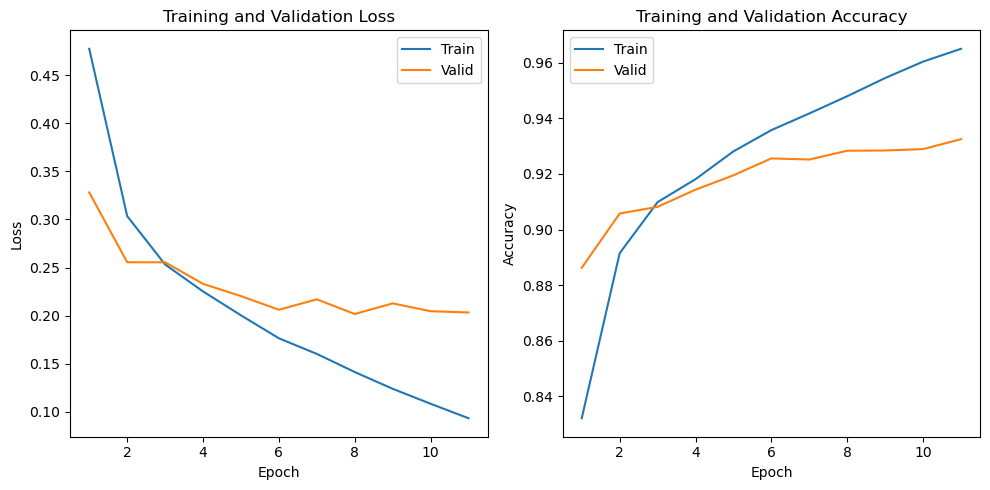

Test Accuracy: 92.95%
Precision: 0.9293
Recall: 0.9295
F1 Score: 0.9288


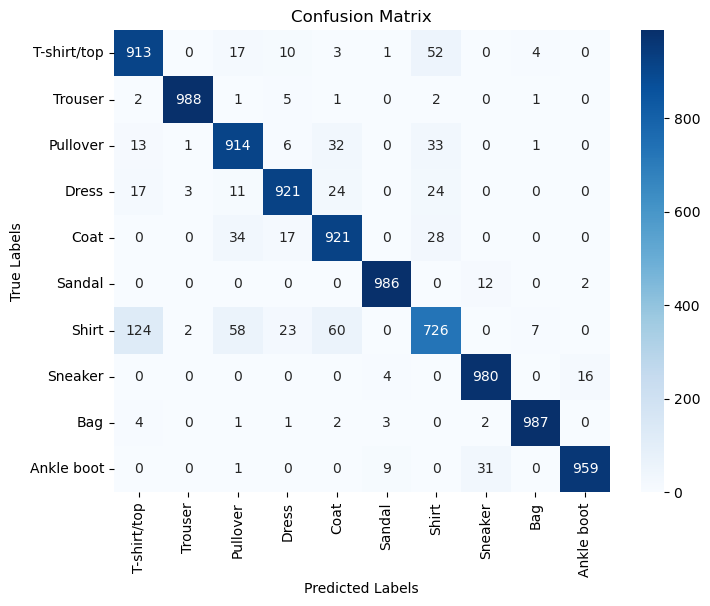

In [76]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_third_bn_dropout.parameters(), lr=0.0001)

train_and_validate(model_third_bn_dropout, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_third_bn_dropout, test_loader, classes, seed=42)

### quarta rete

In [89]:
class FourthCNN(nn.Module):
    def __init__(self):
        super(FourthCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Nuovo blocco
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu6 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(512 * 3 * 3, 256)  
        self.relu7 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool(x)
        
        x = self.conv5(x)
        x = self.relu5(x)
        x = self.conv6(x)
        x = self.relu6(x)
        x = self.pool2(x)
        
        x = x.view(-1, 512 * 3 * 3)  
        x = self.fc1(x)
        x = self.relu7(x)
        x = self.fc2(x)
        return x

model_fourth = FourthCNN()

Epoch [1/100], Train Loss: 0.6544, Train Acc: 75.78%, Valid Loss: 0.4446, Valid Acc: 83.37%
Epoch [2/100], Train Loss: 0.3808, Train Acc: 85.98%, Valid Loss: 0.3532, Valid Acc: 87.32%
Epoch [3/100], Train Loss: 0.3181, Train Acc: 88.36%, Valid Loss: 0.3629, Valid Acc: 86.66%
Epoch [4/100], Train Loss: 0.2778, Train Acc: 89.61%, Valid Loss: 0.2898, Valid Acc: 89.40%
Epoch [5/100], Train Loss: 0.2481, Train Acc: 90.88%, Valid Loss: 0.2628, Valid Acc: 90.54%
Epoch [6/100], Train Loss: 0.2210, Train Acc: 91.78%, Valid Loss: 0.2435, Valid Acc: 91.12%
Epoch [7/100], Train Loss: 0.1994, Train Acc: 92.64%, Valid Loss: 0.2690, Valid Acc: 90.33%
Epoch [8/100], Train Loss: 0.1819, Train Acc: 93.22%, Valid Loss: 0.2317, Valid Acc: 91.60%
Epoch [9/100], Train Loss: 0.1650, Train Acc: 93.86%, Valid Loss: 0.2484, Valid Acc: 90.97%
Epoch [10/100], Train Loss: 0.1478, Train Acc: 94.58%, Valid Loss: 0.2297, Valid Acc: 91.92%
Epoch [11/100], Train Loss: 0.1317, Train Acc: 95.16%, Valid Loss: 0.2267, Vali

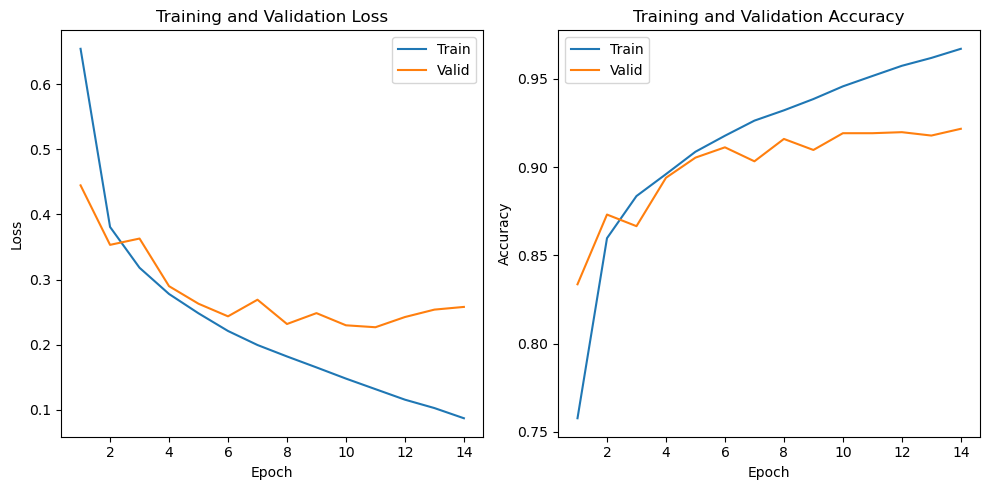

Test Accuracy: 91.75%
Precision: 0.9180
Recall: 0.9175
F1 Score: 0.9175


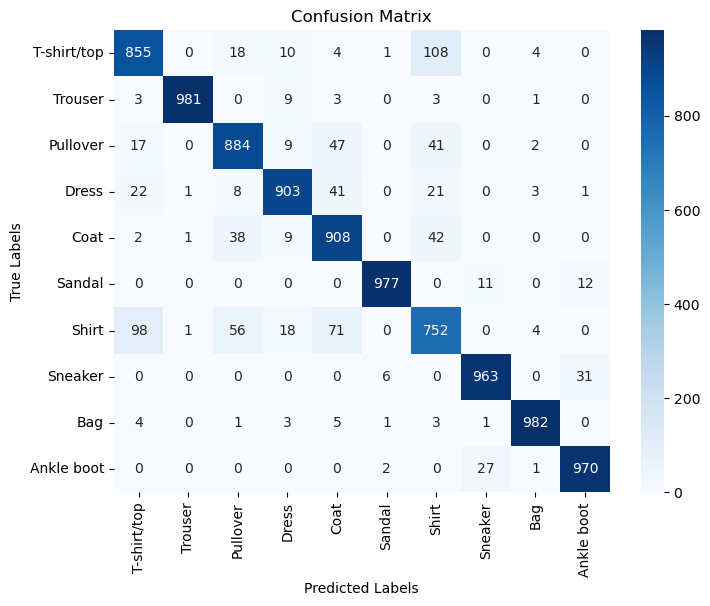

In [90]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fourth.parameters(), lr=0.0001)

train_and_validate(model_fourth, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_fourth, test_loader, classes, seed=42)

In [91]:
class FourthCNN_L2(nn.Module):
    def __init__(self, l2_lambda=0.01):
        super(FourthCNN_L2, self).__init__()
        self.model = FourthCNN()
        self.l2_lambda = l2_lambda

    def forward(self, x):
        return self.model(x)

    def l2_regularization_loss(self):
        l2_loss = 0.0
        for param in self.model.parameters():
            l2_loss += torch.norm(param, p=2)**2
        l2_loss *= 0.5 * self.l2_lambda
        return l2_loss

model_fourth_l2 = FourthCNN_L2()

Epoch [1/100], Train Loss: 0.6416, Train Acc: 76.29%, Valid Loss: 0.4289, Valid Acc: 83.83%
Epoch [2/100], Train Loss: 0.3670, Train Acc: 86.55%, Valid Loss: 0.3324, Valid Acc: 87.81%
Epoch [3/100], Train Loss: 0.3032, Train Acc: 88.85%, Valid Loss: 0.3324, Valid Acc: 87.78%
Epoch [4/100], Train Loss: 0.2679, Train Acc: 90.09%, Valid Loss: 0.2946, Valid Acc: 88.94%
Epoch [5/100], Train Loss: 0.2419, Train Acc: 91.12%, Valid Loss: 0.2601, Valid Acc: 90.32%
Epoch [6/100], Train Loss: 0.2177, Train Acc: 91.95%, Valid Loss: 0.2404, Valid Acc: 91.42%
Epoch [7/100], Train Loss: 0.1969, Train Acc: 92.61%, Valid Loss: 0.2577, Valid Acc: 90.37%
Epoch [8/100], Train Loss: 0.1801, Train Acc: 93.26%, Valid Loss: 0.2283, Valid Acc: 91.75%
Epoch [9/100], Train Loss: 0.1633, Train Acc: 93.96%, Valid Loss: 0.2411, Valid Acc: 91.41%
Epoch [10/100], Train Loss: 0.1475, Train Acc: 94.49%, Valid Loss: 0.2338, Valid Acc: 91.46%
Epoch [11/100], Train Loss: 0.1315, Train Acc: 95.10%, Valid Loss: 0.2297, Vali

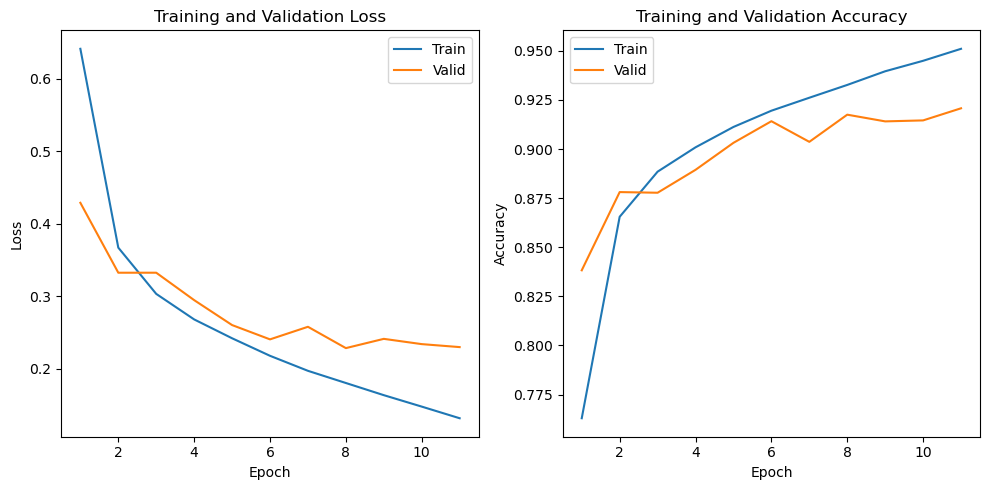

Test Accuracy: 91.43%
Precision: 0.9143
Recall: 0.9143
F1 Score: 0.9139


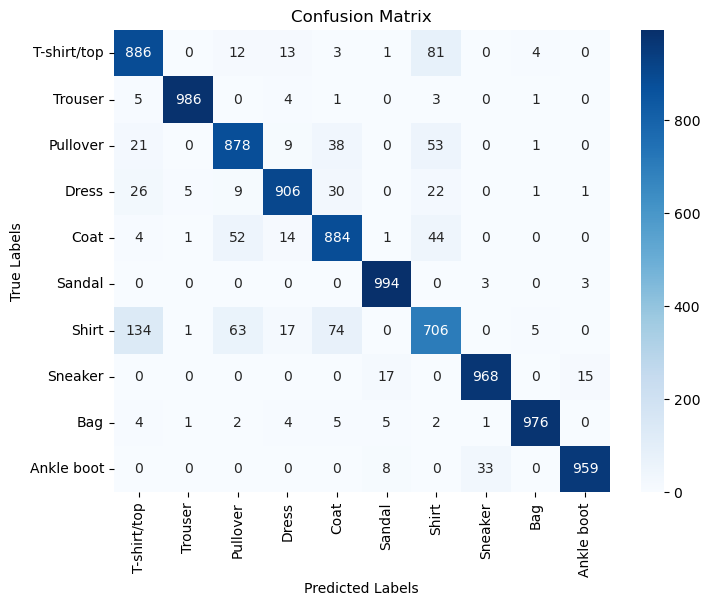

In [92]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fourth_l2.parameters(), lr=0.0001)

train_and_validate(model_fourth_l2, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_fourth_l2, test_loader, classes, seed=42)

In [93]:
class FourthCNNdropout_fc(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super(FourthCNNdropout_fc, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu6 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(512 * 3 * 3, 256)  
        self.relu7 = nn.ReLU()
        self.fc_dropout = nn.Dropout(dropout_prob)  
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool(x)
        
        x = self.conv5(x)
        x = self.relu5(x)
        x = self.conv6(x)
        x = self.relu6(x)
        x = self.pool2(x)
        
        x = x.view(-1, 512 * 3 * 3)  
        x = self.fc1(x)
        x = self.relu7(x)
        x = self.fc_dropout(x)  
        x = self.fc2(x)
        return x

model_fourth_dropout_fc = FourthCNNdropout_fc()

Epoch [1/100], Train Loss: 0.7466, Train Acc: 72.91%, Valid Loss: 0.4575, Valid Acc: 82.83%
Epoch [2/100], Train Loss: 0.4400, Train Acc: 83.88%, Valid Loss: 0.3635, Valid Acc: 86.54%
Epoch [3/100], Train Loss: 0.3675, Train Acc: 86.61%, Valid Loss: 0.3347, Valid Acc: 87.46%
Epoch [4/100], Train Loss: 0.3232, Train Acc: 88.35%, Valid Loss: 0.2893, Valid Acc: 89.08%
Epoch [5/100], Train Loss: 0.2929, Train Acc: 89.36%, Valid Loss: 0.2779, Valid Acc: 89.60%
Epoch [6/100], Train Loss: 0.2704, Train Acc: 90.22%, Valid Loss: 0.2534, Valid Acc: 90.26%
Epoch [7/100], Train Loss: 0.2492, Train Acc: 90.95%, Valid Loss: 0.2558, Valid Acc: 90.42%
Epoch [8/100], Train Loss: 0.2311, Train Acc: 91.51%, Valid Loss: 0.2434, Valid Acc: 90.94%
Epoch [9/100], Train Loss: 0.2175, Train Acc: 92.15%, Valid Loss: 0.2370, Valid Acc: 91.42%
Epoch [10/100], Train Loss: 0.2037, Train Acc: 92.56%, Valid Loss: 0.2260, Valid Acc: 91.43%
Epoch [11/100], Train Loss: 0.1903, Train Acc: 92.91%, Valid Loss: 0.2309, Vali

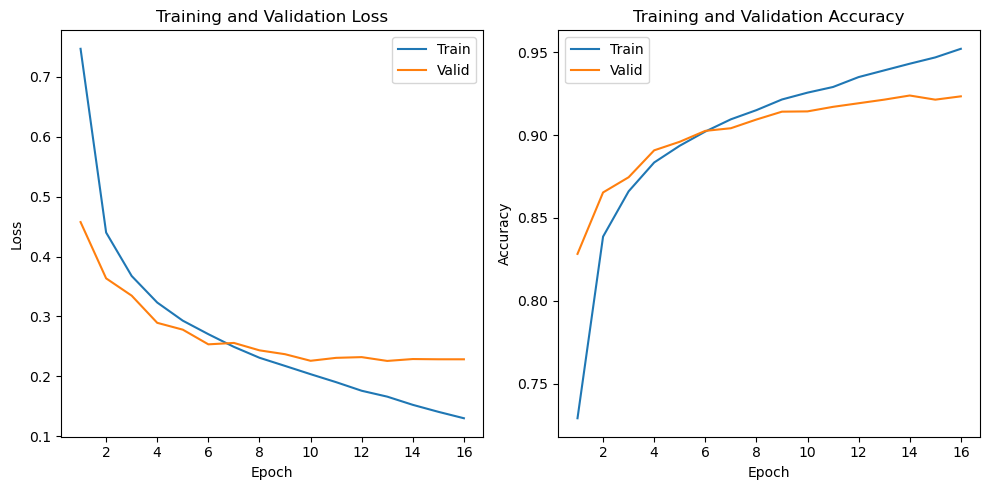

Test Accuracy: 91.82%
Precision: 0.9180
Recall: 0.9182
F1 Score: 0.9179


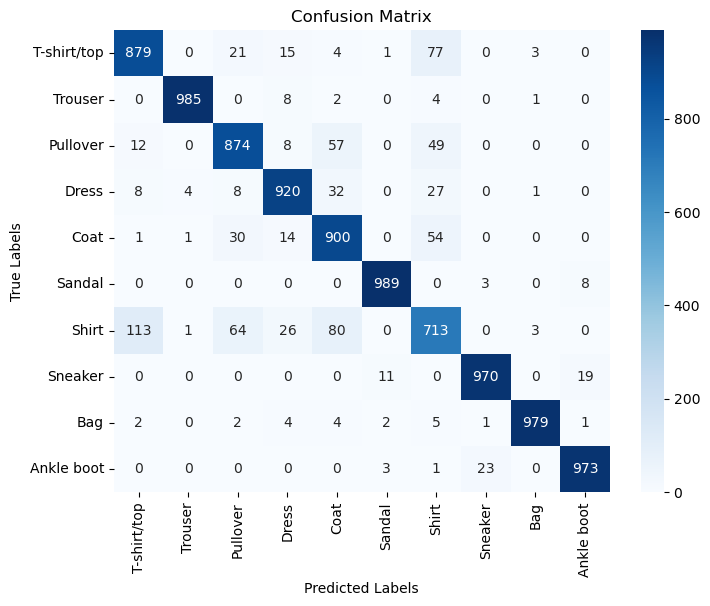

In [94]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fourth_dropout_fc.parameters(), lr=0.0001)

train_and_validate(model_fourth_dropout_fc, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_fourth_dropout_fc, test_loader, classes, seed=42)

In [95]:
class FourthCNN_drop(nn.Module):
    def __init__(self, dropout_conv_prob=0.2, dropout_fc_prob=0.5):
        super(FourthCNN_drop, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Nuovo blocco
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu6 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(512 * 3 * 3, 256)  # Aggiornato il numero di feature
        self.relu7 = nn.ReLU()
        self.dropout_conv = nn.Dropout(dropout_conv_prob)  # Dropout per i layer convoluzionali
        self.dropout_fc = nn.Dropout(dropout_fc_prob)  # Dropout per i layer completamente connessi
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.dropout_conv(x)  # Dropout applicato ai layer convoluzionali
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.dropout_conv(x)  # Dropout applicato ai layer convoluzionali
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool(x)
        
        # Nuovo blocco
        x = self.conv5(x)
        x = self.relu5(x)
        x = self.dropout_conv(x)  # Dropout applicato ai layer convoluzionali
        x = self.conv6(x)
        x = self.relu6(x)
        x = self.pool2(x)
        
        x = x.view(-1, 512 * 3 * 3)  # Aggiornato il numero di feature
        x = self.fc1(x)
        x = self.relu7(x)
        x = self.dropout_fc(x)  # Dropout applicato ai layer completamente connessi
        x = self.fc2(x)
        return x

model_fourth = FourthCNN_drop()

Epoch [1/100], Train Loss: 0.7778, Train Acc: 71.29%, Valid Loss: 0.5252, Valid Acc: 81.92%
Epoch [2/100], Train Loss: 0.4662, Train Acc: 82.78%, Valid Loss: 0.3900, Valid Acc: 86.02%
Epoch [3/100], Train Loss: 0.3885, Train Acc: 85.84%, Valid Loss: 0.3479, Valid Acc: 87.18%
Epoch [4/100], Train Loss: 0.3517, Train Acc: 87.19%, Valid Loss: 0.3215, Valid Acc: 88.40%
Epoch [5/100], Train Loss: 0.3217, Train Acc: 88.38%, Valid Loss: 0.3122, Valid Acc: 88.71%
Epoch [6/100], Train Loss: 0.2953, Train Acc: 89.09%, Valid Loss: 0.2804, Valid Acc: 89.45%
Epoch [7/100], Train Loss: 0.2747, Train Acc: 89.88%, Valid Loss: 0.2725, Valid Acc: 90.20%
Epoch [8/100], Train Loss: 0.2584, Train Acc: 90.44%, Valid Loss: 0.2587, Valid Acc: 90.44%
Epoch [9/100], Train Loss: 0.2462, Train Acc: 90.86%, Valid Loss: 0.2679, Valid Acc: 90.32%
Epoch [10/100], Train Loss: 0.2286, Train Acc: 91.41%, Valid Loss: 0.2467, Valid Acc: 90.91%
Epoch [11/100], Train Loss: 0.2186, Train Acc: 91.91%, Valid Loss: 0.2449, Vali

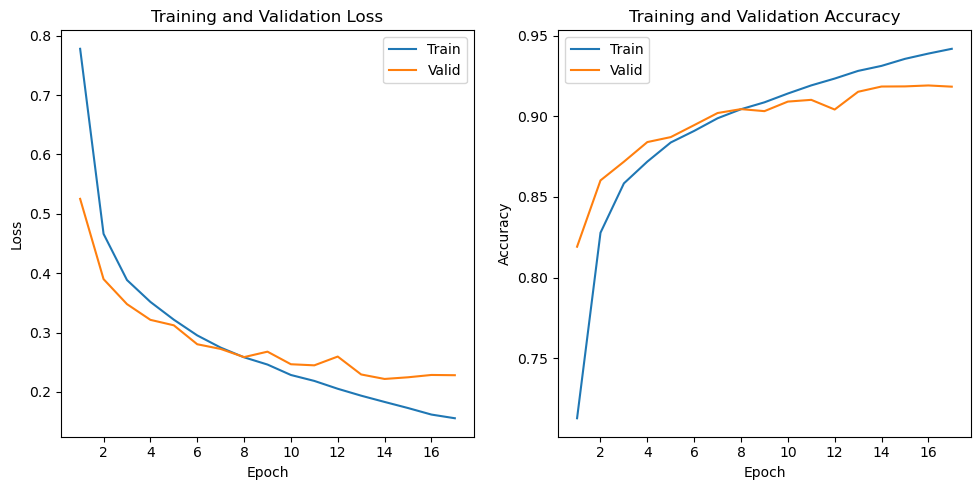

Test Accuracy: 91.56%
Precision: 0.9163
Recall: 0.9156
F1 Score: 0.9149


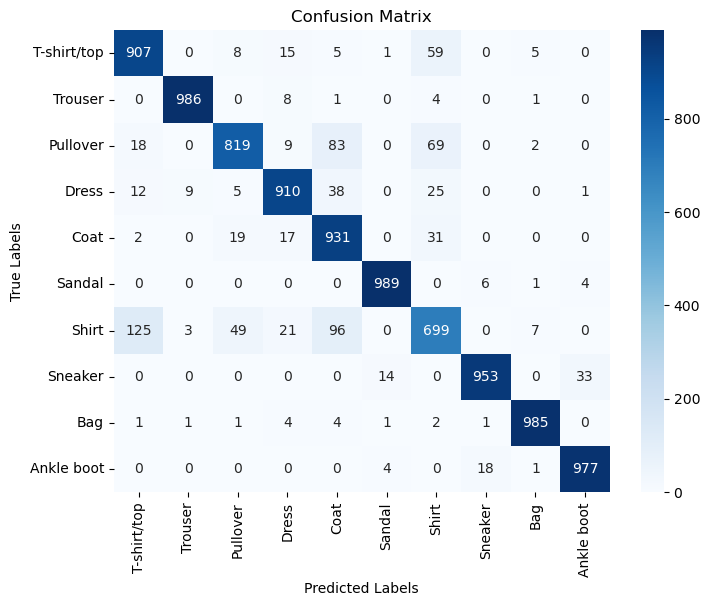

In [96]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fourth.parameters(), lr=0.0001)

train_and_validate(model_fourth, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_fourth, test_loader, classes, seed=42)

In [97]:
class FourthCNNBatchNorm(nn.Module):
    def __init__(self, dropout_conv_prob=0.2, dropout_fc_prob=0.5):
        super(FourthCNNBatchNorm, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.batchnorm4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Nuovo blocco
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.batchnorm5 = nn.BatchNorm2d(512)
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.batchnorm6 = nn.BatchNorm2d(512)
        self.relu6 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(512 * 3 * 3, 256)  # Aggiornato il numero di feature
        self.batchnorm7 = nn.BatchNorm1d(256)
        self.relu7 = nn.ReLU()
        self.dropout_conv = nn.Dropout(dropout_conv_prob)  # Dropout per i layer convoluzionali
        self.dropout_fc = nn.Dropout(dropout_fc_prob)  # Dropout per i layer completamente connessi
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.relu1(x)
        x = self.dropout_conv(x)  # Dropout applicato ai layer convoluzionali
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.batchnorm3(x)
        x = self.relu3(x)
        x = self.dropout_conv(x)  # Dropout applicato ai layer convoluzionali
        x = self.conv4(x)
        x = self.batchnorm4(x)
        x = self.relu4(x)
        x = self.pool(x)
        
        # Nuovo blocco
        x = self.conv5(x)
        x = self.batchnorm5(x)
        x = self.relu5(x)
        x = self.dropout_conv(x)  # Dropout applicato ai layer convoluzionali
        x = self.conv6(x)
        x = self.batchnorm6(x)
        x = self.relu6(x)
        x = self.pool2(x)
        
        x = x.view(-1, 512 * 3 * 3)  # Aggiornato il numero di feature
        x = self.fc1(x)
        x = self.batchnorm7(x)
        x = self.relu7(x)
        x = self.dropout_fc(x)  # Dropout applicato ai layer completamente connessi
        x = self.fc2(x)
        return x

model_fourth_batchnorm = FourthCNNBatchNorm()

Epoch [1/100], Train Loss: 0.5241, Train Acc: 83.02%, Valid Loss: 0.3344, Valid Acc: 88.40%
Epoch [2/100], Train Loss: 0.3213, Train Acc: 88.95%, Valid Loss: 0.3424, Valid Acc: 87.71%
Epoch [3/100], Train Loss: 0.2718, Train Acc: 90.39%, Valid Loss: 0.2858, Valid Acc: 89.83%
Epoch [4/100], Train Loss: 0.2442, Train Acc: 91.19%, Valid Loss: 0.2728, Valid Acc: 90.42%
Epoch [5/100], Train Loss: 0.2175, Train Acc: 92.33%, Valid Loss: 0.2443, Valid Acc: 91.43%
Epoch [6/100], Train Loss: 0.1974, Train Acc: 92.78%, Valid Loss: 0.2661, Valid Acc: 90.97%
Epoch [7/100], Train Loss: 0.1788, Train Acc: 93.55%, Valid Loss: 0.2457, Valid Acc: 91.36%
Epoch [8/100], Train Loss: 0.1612, Train Acc: 94.23%, Valid Loss: 0.1967, Valid Acc: 93.14%
Epoch [9/100], Train Loss: 0.1472, Train Acc: 94.67%, Valid Loss: 0.2426, Valid Acc: 91.78%
Epoch [10/100], Train Loss: 0.1307, Train Acc: 95.28%, Valid Loss: 0.2116, Valid Acc: 92.78%
Epoch [11/100], Train Loss: 0.1174, Train Acc: 95.75%, Valid Loss: 0.2097, Vali

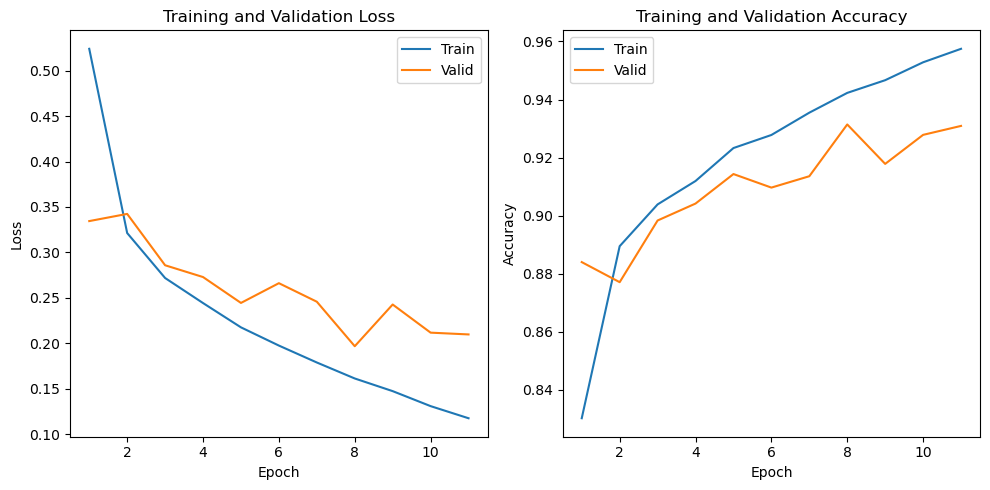

Test Accuracy: 92.56%
Precision: 0.9261
Recall: 0.9256
F1 Score: 0.9241


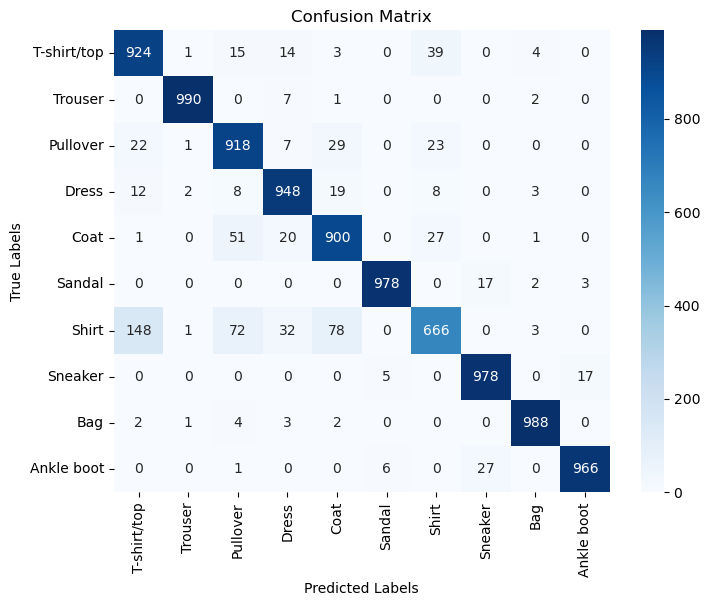

In [98]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fourth_batchnorm.parameters(), lr=0.0001)

train_and_validate(model_fourth_batchnorm, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_fourth_batchnorm, test_loader, classes, seed=42)

In [99]:
class FourthCNNBatchNormDropout(nn.Module):
    def __init__(self, dropout_conv_prob=0.2, dropout_fc_prob=0.5):
        super(FourthCNNBatchNormDropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.batchnorm4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Nuovo blocco
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.batchnorm5 = nn.BatchNorm2d(512)
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.batchnorm6 = nn.BatchNorm2d(512)
        self.relu6 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(512 * 3 * 3, 256)  # Aggiornato il numero di feature
        self.batchnorm7 = nn.BatchNorm1d(256)
        self.relu7 = nn.ReLU()
        self.dropout_fc = nn.Dropout(dropout_fc_prob)  # Dropout per i layer completamente connessi
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.batchnorm3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.batchnorm4(x)
        x = self.relu4(x)
        x = self.pool(x)
        
        # Nuovo blocco
        x = self.conv5(x)
        x = self.batchnorm5(x)
        x = self.relu5(x)
        x = self.conv6(x)
        x = self.batchnorm6(x)
        x = self.relu6(x)
        x = self.pool2(x)
        
        x = x.view(-1, 512 * 3 * 3)  # Aggiornato il numero di feature
        x = self.fc1(x)
        x = self.batchnorm7(x)
        x = self.relu7(x)
        x = self.dropout_fc(x)  # Dropout applicato ai layer completamente connessi
        x = self.fc2(x)
        return x

model_fourth_batchnorm_dropout = FourthCNNBatchNormDropout()

Epoch [1/100], Train Loss: 0.4200, Train Acc: 86.87%, Valid Loss: 0.2802, Valid Acc: 90.39%
Epoch [2/100], Train Loss: 0.2449, Train Acc: 91.78%, Valid Loss: 0.2332, Valid Acc: 91.97%
Epoch [3/100], Train Loss: 0.1799, Train Acc: 93.91%, Valid Loss: 0.2468, Valid Acc: 91.22%
Epoch [4/100], Train Loss: 0.1310, Train Acc: 95.57%, Valid Loss: 0.2306, Valid Acc: 91.76%
Epoch [5/100], Train Loss: 0.0899, Train Acc: 97.11%, Valid Loss: 0.2665, Valid Acc: 91.15%
Epoch [6/100], Train Loss: 0.0605, Train Acc: 98.05%, Valid Loss: 0.2599, Valid Acc: 91.89%
Epoch [7/100], Train Loss: 0.0490, Train Acc: 98.47%, Valid Loss: 0.2594, Valid Acc: 92.12%
No improvement in validation loss for 3 epochs. Early stopping...


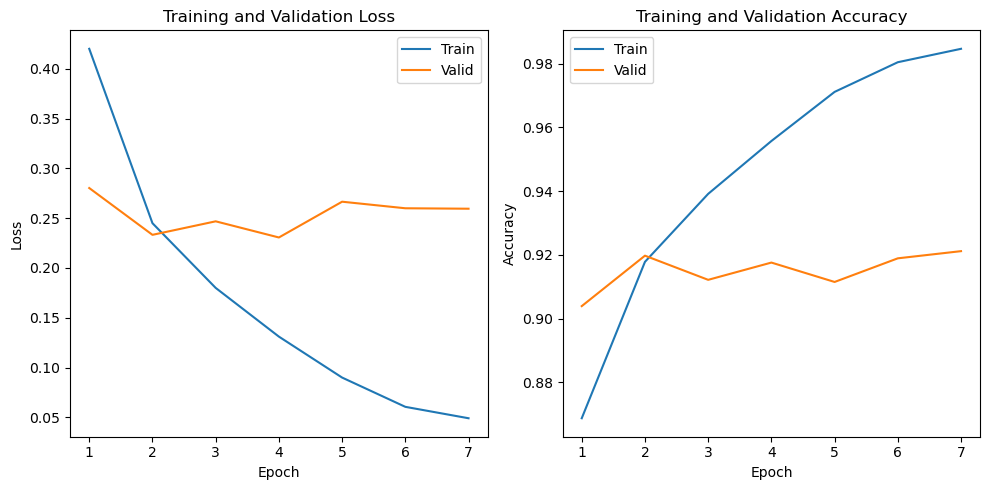

Test Accuracy: 91.96%
Precision: 0.9198
Recall: 0.9196
F1 Score: 0.9194


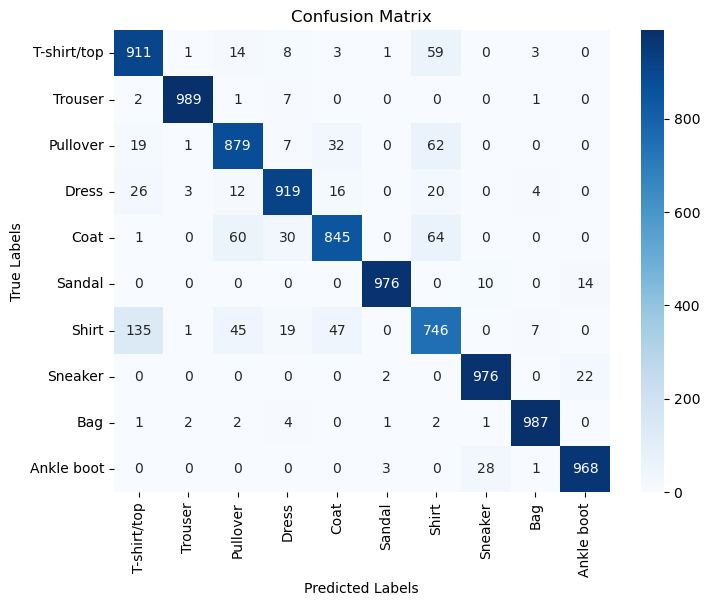

In [100]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fourth_batchnorm_dropout.parameters(), lr=0.0001)

train_and_validate(model_fourth_batchnorm_dropout, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_fourth_batchnorm_dropout, test_loader, classes, seed=42)